<a href="https://colab.research.google.com/github/eaedk/Machine-Learning-Tutorials/blob/main/ML_Step_By_Step_Guide.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Customer Churn Prediction Challenge For Azubian**

## **Project Statement of the Problem**:
The focus of this project is a customer churn prediction for an African telecommunications firm that provides customers with airtime and mobile data bundles. The company aims to create a machine learning model capable of effectively forecasting the probability of individual customers "churning," which means they become inactive and not making any transactions for a period of 90 days. Accurate churn prediction plays a pivotal role in the company's success, as it empowers proactive strategies to retain customers and minimize revenue loss.

## **Project Objective**:
The objective of this challenge is to develop a machine learning model to predict the likelihood of each customer “churning,” i.e. becoming inactive and not making any transactions for 90 days. This will help this telecom company to better serve their customers by understanding which customers are at risk of leaving.

## **Hypothesis 1**

**Null hypothesis(H0)**: There is no significant relationship between the customers' Tenure and the churn rate. In other words, how long a customer stays does not influence whether the customer churns or not.

**Alternative hypothesisH1)**: There is a significant relationship between the customers' Tenure and the churn rate. In other words, how long a customer stays influences whether the customer churns or not.

## **Hypothesis 2**

**Null hypothesis(H0)**: There is no significant relationship between the customers' Revenue and the churn rate. In other words, a customers income does not influence whether the customer churns or not.

**Alternative hypothesisH1)**: There is a significant relationship between the customers' Revenue and the churn rate. In other words, a customers income influences whether the customer churns or not.

## **Business Questions**

### 1. What is the Company’s overall churn rate throughout the observed period?

### 2. Are there particular regions that exhibit a higher churn rate than others?

### 3. Which tenure period shows the most significant representation?

### 4. Is there a relationship between the top-up amount (MONTANT) and the churn rate?

### 5. Is there a reduced likelihood of churn among customers who frequently activate specific top-pack packages (TOP_PACK)?

### 6. Do customers with a higher volume of on-net calls (ON_NET) demonstrate a lower likelihood of churning?

### 7. Is there a disparity in churn rates between customers who regularly refill their accounts (FREQUENCE_RECH) and those who refill less frequently?



 .

.

# Data Understanding
- Data collated from the ***Customer Relationship Management*** team contains demographic and usage information for each customer as well as whether or not they churned. Below are meanings to each varible provided in the dataset

The churn dataset includes 19 variables including 15 numeric variables and 4 categorical variables.
1. user_id - Unique identifier for each customer
2. REGION - the location of each client
3. TENURE - duration in the network
4. MONTANT - top-up amount
5. FREQUENCE_RECH - number of times the customer refilled
5. REVENUE - monthly income of each client
6. ARPU_SEGMENT - income over 90 days / 3
7. FREQUENCE - number of times the client has made an income
8. DATA_VOLUME - number of connections
9. ON_NET - inter expresso call
10. ORANGE - call to orange
11. TIGO - call to Tigo
12. ZONE1 - call to zones1
13. ZONE2 - call to zones2
14. MRG - a client who is going
15. REGULARITY - number of times the client is active for 90 days
16. TOP_PACK - the most active packs
17. FREQ_TOP_PACK - number of times the client has activated the top pack packages
18. CHURN - variable to predict - Target

# Setup

## Installation
Here is the section to install all the packages/libraries that will be needed to tackle the challlenge.

In [5]:
#Installing relevant libraries
%pip install tabulate
%pip install plotly
%pip install statsmodels
%pip install imblearn
%pip install phik
%pip install xgboost
%pip install squarify
!pip install catboost --q

## Importation
Here is the section to import all the packages/libraries that will be used through this notebook.

In [6]:
# Data handling
import pandas as pd
import numpy as np

# Vizualisation
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick
import squarify
import plotly.express as px
# EDA (pandas-profiling, etc. )

# Feature Processing (Scikit-learn processing, etc. )
from sklearn.preprocessing import OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier

# Feature Engineering
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import *
from sklearn.preprocessing import MinMaxScaler,StandardScaler, LabelEncoder

# Machine Learning (Scikit-learn Estimators, Catboost, LightGBM, etc. )
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier
# Modelling
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import *
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

#import lightgbm as lgb
import xgboost as xgb
from xgboost import *

# Model evaluation
from sklearn import metrics
from sklearn.metrics import *

# Hyperparameters Fine-tuning (Scikit-learn hp search, cross-validation, etc. )
...

# Other packages
import os, pickle


In [7]:
#pip install scikit-learn==1.2.2


# Data Loading
Here is the section to load the datasets (train, eval, test) and the additional files

In [8]:
#
train = pd.read_csv("Train.csv")
test = pd.read_csv("Test.csv")

# Data Understanding

## Data Exploration & Data Preparation

### Preview Datasets

In [9]:
# previewing a section of the train dataset
train.head()

,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK,CHURN
0,7ee9e11e342e27c70455960acc80d3f91c1286d1,DAKAR,K > 24 month,20000.0,47.0,21602.0,7201.0,52.0,8835.0,3391.0,396.0,185.0,NaN,NaN,NO,62.0,On net 200F=Unlimited _call24H,30.0,0.0
1,50443f42bdc92b10388fc56e520e4421a5fa655c,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,3.0,NaN,NaN,0.0
2,da90b5c1a9b204c186079f89969aa01cb03c91b2,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,1.0,NaN,NaN,0.0
3,364ec1b424cdc64c25441a444a16930289a0051e,SAINT-LOUIS,K > 24 month,7900.0,19.0,7896.0,2632.0,25.0,9385.0,27.0,46.0,20.0,NaN,2.0,NO,61.0,"Data:490F=1GB,7d",7.0,0.0
4,d5a5247005bc6d41d3d99f4ef312ebb5f640f2cb,DAKAR,K > 24 month,12350.0,21.0,12351.0,4117.0,29.0,9360.0,66.0,102.0,34.0,NaN,NaN,NO,56.0,All-net 500F=2000F;5d,11.0,0.0


In [10]:
# previewing a section of the test dataset
test.head()

,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK
0,51fe4c3347db1f8571d18ac03f716c41acee30a4,MATAM,I 18-21 month,2500.0,5.0,2500.0,833.0,5.0,0.0,64.0,70.0,NaN,NaN,NaN,NO,35.0,All-net 500F=2000F;5d,5.0
1,5ad5d67c175bce107cc97b98c4e37dcc38aa7f3e,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,2.0,NaN,NaN
2,5a4db591c953a8d8f373877fad37aaf4268899a1,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NO,22.0,NaN,NaN
3,8bf9b4d8880aeba1c9a0da48be78f12e629be37c,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,6.0,NaN,NaN
4,c7cdf2af01e9fa95bf498b68c122aa4b9a8d10df,SAINT-LOUIS,K > 24 month,5100.0,7.0,5637.0,1879.0,15.0,7783.0,30.0,24.0,0.0,0.0,NaN,NO,60.0,"Data:1000F=2GB,30d",4.0


In [11]:
train.shape, test.shape

((69761, 19), (70806, 18))

In [12]:
train.columns.values, test.columns.values

(array(['user_id', 'REGION', 'TENURE', 'MONTANT', 'FREQUENCE_RECH',
        'REVENUE', 'ARPU_SEGMENT', 'FREQUENCE', 'DATA_VOLUME', 'ON_NET',
        'ORANGE', 'TIGO', 'ZONE1', 'ZONE2', 'MRG', 'REGULARITY',
        'TOP_PACK', 'FREQ_TOP_PACK', 'CHURN'], dtype=object),
 array(['user_id', 'REGION', 'TENURE', 'MONTANT', 'FREQUENCE_RECH',
        'REVENUE', 'ARPU_SEGMENT', 'FREQUENCE', 'DATA_VOLUME', 'ON_NET',
        'ORANGE', 'TIGO', 'ZONE1', 'ZONE2', 'MRG', 'REGULARITY',
        'TOP_PACK', 'FREQ_TOP_PACK'], dtype=object))

In [13]:
# Checking the data types of the columns
print('Train Column type')
print (train.dtypes)


Train Column type
user_id            object
REGION             object
TENURE             object
MONTANT           float64
FREQUENCE_RECH    float64
REVENUE           float64
ARPU_SEGMENT      float64
FREQUENCE         float64
DATA_VOLUME       float64
ON_NET            float64
ORANGE            float64
TIGO              float64
ZONE1             float64
ZONE2             float64
MRG                object
REGULARITY        float64
TOP_PACK           object
FREQ_TOP_PACK     float64
CHURN             float64
dtype: object


In [14]:
print('Test Column type')
print (test.dtypes)

Test Column type
user_id            object
REGION             object
TENURE             object
MONTANT           float64
FREQUENCE_RECH    float64
REVENUE           float64
ARPU_SEGMENT      float64
FREQUENCE         float64
DATA_VOLUME       float64
ON_NET            float64
ORANGE            float64
TIGO              float64
ZONE1             float64
ZONE2             float64
MRG                object
REGULARITY        float64
TOP_PACK           object
FREQ_TOP_PACK     float64
dtype: object


**Remark**

Our train Dataset has 19 variables and 16 of them are numeric with our target variable "Churn" also being numeric

same applies to the test dataset, just that it is missing the target variable

In [15]:
# taking the Statistical Summary of the the train numeric Dataset
train.describe()

,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,REGULARITY,FREQ_TOP_PACK,CHURN
count,45220.000000,45220.000000,46322.000000,46322.000000,46322.000000,35267.000000,44471.000000,40741.000000,27890.000000,5436.000000,4440.000000,69760.000000,40521.000000,69760.000000
mean,5502.178195,11.422711,5467.508355,1822.508549,13.807111,3354.075595,270.129073,94.464741,23.028899,8.315857,9.147748,27.976907,9.156882,0.188231
std,7252.339470,13.185786,7304.307324,2434.764842,14.574001,12339.757496,866.909138,203.713837,65.792938,34.090142,69.503947,22.271094,11.979037,0.390899
min,50.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,1000.000000,2.000000,1000.000000,333.000000,3.000000,0.000000,5.000000,7.000000,2.000000,0.000000,0.000000,6.000000,2.000000,0.000000
50%,3000.000000,6.000000,3000.000000,1000.000000,9.000000,250.000000,27.000000,28.000000,6.000000,1.000000,2.000000,24.000000,5.000000,0.000000
75%,7200.000000,15.000000,7203.750000,2401.000000,19.000000,2799.500000,154.000000,98.000000,20.000000,4.000000,5.000000,50.000000,12.000000,0.000000
max,286500.000000,110.000000,323541.000000,107847.000000,91.000000,671476.000000,26298.000000,6721.000000,3486.000000,767.000000,3697.000000,62.000000,258.000000,1.000000


**Observation**
1. Average frquecy at which people Top-up is 11.5 times and with a total average amount of 5529.21
2. 75% of users recharging 16 times, where as 50% recharge about 7times and 25% do so 2 times
3. With a standard deviation of 7175, it can be observed that incomes of clients are clustered around the mean value of 5506
4. It can also be observed that average on-net calls is more than calls to other networks.
5. Clients made more calls to orange numbers as compared to that of the Tigo

In [16]:
# Chech info of the variables,  To have a concise look at the dataframe, we will use verbose = True mode
train.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69761 entries, 0 to 69760
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   user_id         69761 non-null  object 
 1   REGION          42149 non-null  object 
 2   TENURE          69761 non-null  object 
 3   MONTANT         45220 non-null  float64
 4   FREQUENCE_RECH  45220 non-null  float64
 5   REVENUE         46322 non-null  float64
 6   ARPU_SEGMENT    46322 non-null  float64
 7   FREQUENCE       46322 non-null  float64
 8   DATA_VOLUME     35267 non-null  float64
 9   ON_NET          44471 non-null  float64
 10  ORANGE          40741 non-null  float64
 11  TIGO            27890 non-null  float64
 12  ZONE1           5436 non-null   float64
 13  ZONE2           4440 non-null   float64
 14  MRG             69761 non-null  object 
 15  REGULARITY      69760 non-null  float64
 16  TOP_PACK        40521 non-null  object 
 17  FREQ_TOP_PACK   40521 non-null 

In [17]:
# Checking for Duplicated values
train.duplicated().sum()

0

### Checking for Missing Values

In [18]:
#checking for missing values
train.isnull().sum()

user_id               0
REGION            27612
TENURE                0
MONTANT           24541
FREQUENCE_RECH    24541
REVENUE           23439
ARPU_SEGMENT      23439
FREQUENCE         23439
DATA_VOLUME       34494
ON_NET            25290
ORANGE            29020
TIGO              41871
ZONE1             64325
ZONE2             65321
MRG                   0
REGULARITY            1
TOP_PACK          29240
FREQ_TOP_PACK     29240
CHURN                 1
dtype: int64

In [19]:
# Our data seem to be missing a lot of values
percentage_missing =(train.isnull().sum() / len(train)) * 100
percentage_missing

user_id            0.000000
REGION            39.580855
TENURE             0.000000
MONTANT           35.178681
FREQUENCE_RECH    35.178681
REVENUE           33.599002
ARPU_SEGMENT      33.599002
FREQUENCE         33.599002
DATA_VOLUME       49.445966
ON_NET            36.252347
ORANGE            41.599174
TIGO              60.020642
ZONE1             92.207681
ZONE2             93.635412
MRG                0.000000
REGULARITY         0.001433
TOP_PACK          41.914537
FREQ_TOP_PACK     41.914537
CHURN              0.001433
dtype: float64

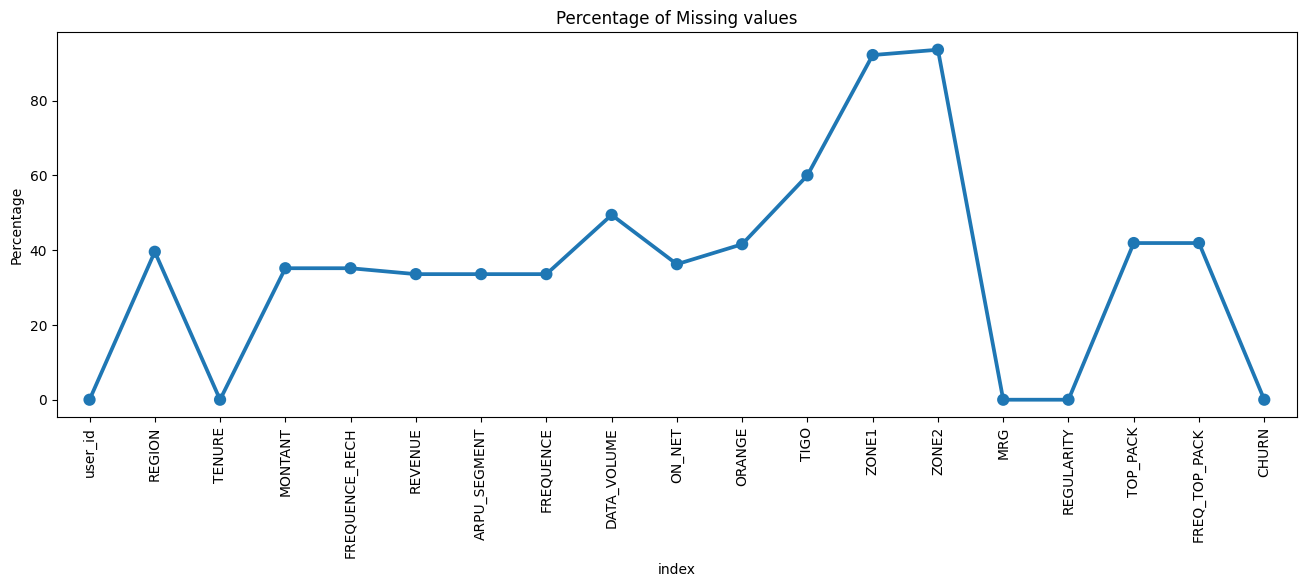

In [20]:
# Plotting  a Graphical view of the percentage of our Missing Data
missing = pd.DataFrame((train.isnull().sum())*100/train.shape[0]).reset_index()
plt.figure(figsize=(16,5))
ax = sns.pointplot(x='index', y=0,data=missing)
plt.xticks(rotation = 90, fontsize = 10)
plt.title("Percentage of Missing values")
plt.ylabel("Percentage")
plt.show()

# Exploratory Data Analysis: EDA
Here is the section to **inspect** the datasets in depth, **present** it, make **hypotheses** and **think** the *cleaning, processing and features creation*.

## Univariate Analysis
in this section we will explore, analyze, visualize each variable independently of the others.

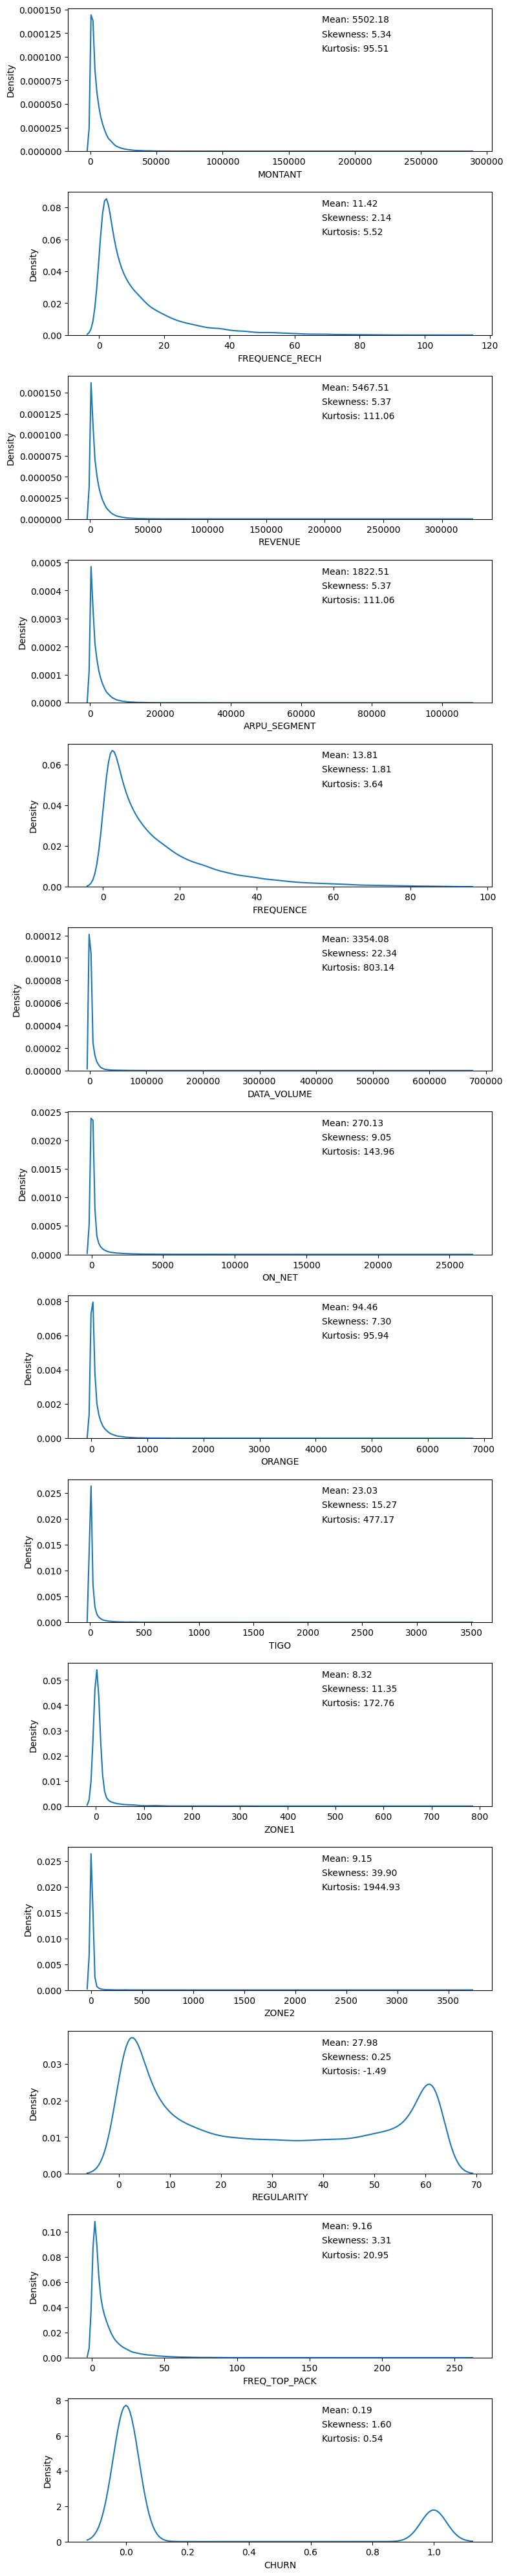

In [21]:

# Extracting all numerical variables
num_cols = train.select_dtypes(include=['int64','float64']).columns

# Plot KDEs(kernel density estimation) for all numerical columns
fig, axes = plt.subplots(nrows=len(num_cols), figsize=(8, 40))
for i, col in enumerate(num_cols):
    sns.kdeplot(data=train, x=col, ax=axes[i])
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Density')

    # Calculate mean, skewness, and kurtosis
    mean_val = train[col].mean()
    skewness_val = train[col].skew()
    kurtosis_val = train[col].kurtosis()

    # Add mean, skewness, and kurtosis as text annotations
    axes[i].text(0.6, 0.9, f'Mean: {mean_val:.2f}', transform=axes[i].transAxes)
    axes[i].text(0.6, 0.8, f'Skewness: {skewness_val:.2f}', transform=axes[i].transAxes)
    axes[i].text(0.6, 0.7, f'Kurtosis: {kurtosis_val:.2f}', transform=axes[i].transAxes)

plt.tight_layout()
plt.show()

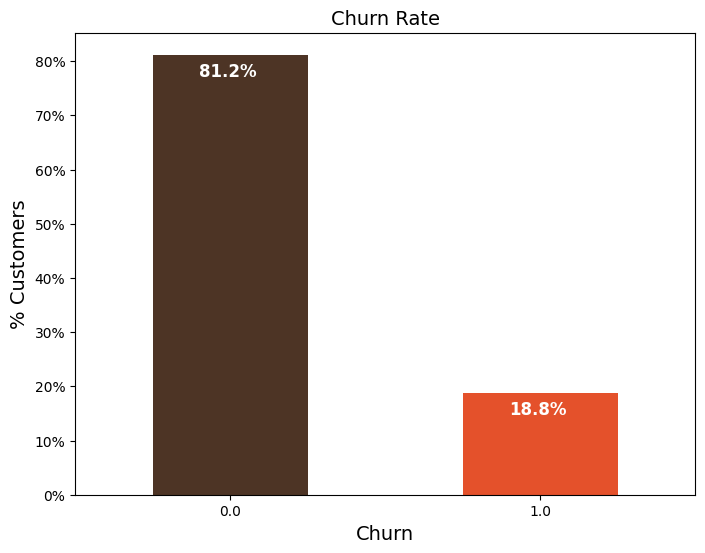

In [22]:
# Checking the percentage of customers who churned again those who did not
colors = ['#4D3425','#E4512B']
ax = (train['CHURN'].value_counts()*100.0 /len(train)).plot(kind='bar', stacked = True,
                                                                          rot = 0, color = colors,figsize = (8,6))
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers',size = 14)
ax.set_xlabel('Churn',size = 14)
ax.set_title('Churn Rate', size = 14)

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())
# set individual bar lables using above list
total = sum(totals)

for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_x()+.15, i.get_height()-4.0, \
            str(round((i.get_height()/total), 1))+'%',
            fontsize=12,
            color='white',
           weight = 'bold')

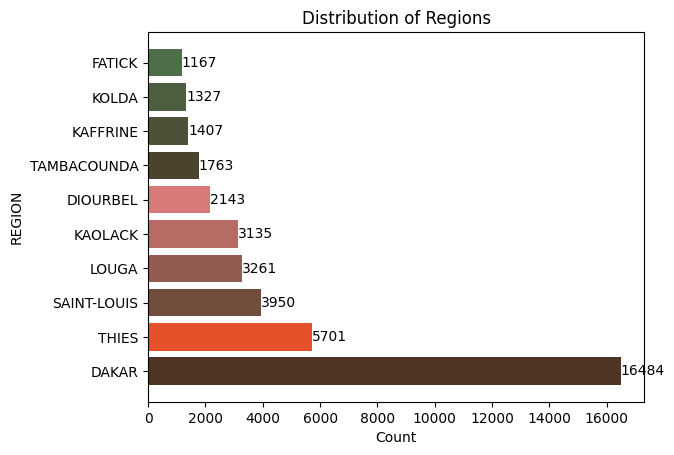

In [23]:
#Horizontal bar distribution of the Region
region= train['REGION'].value_counts().head(10)
colors = ['#4D3425','#E4512B','#704D3D','#935C51','#B66B65','#D97A7A','#4D422E','#4D5137','#4D5F40','#4D6E49']

plt.barh(region.index, region.values, color=colors)
plt.xlabel('Count')
plt.ylabel('REGION')
plt.title('Distribution of Regions')

# Add data labels
for i, count in enumerate(region.values):
    plt.text(count, i, str(count), ha='left', va='center')

plt.show()

## Bivariate & Multivariate Analysis
Here is the section to explore, analyze, visualize each variable in relation to the others.

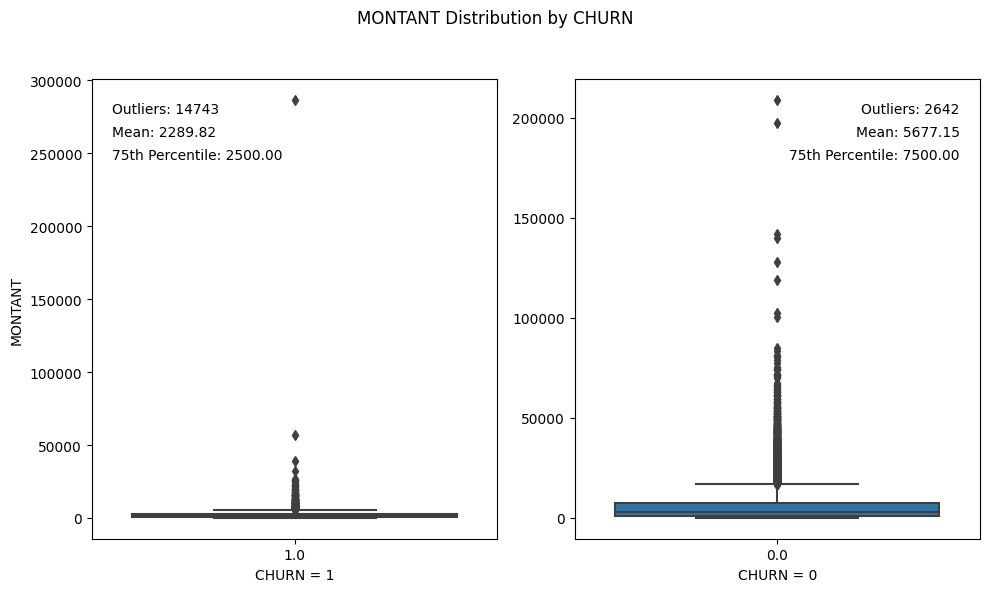

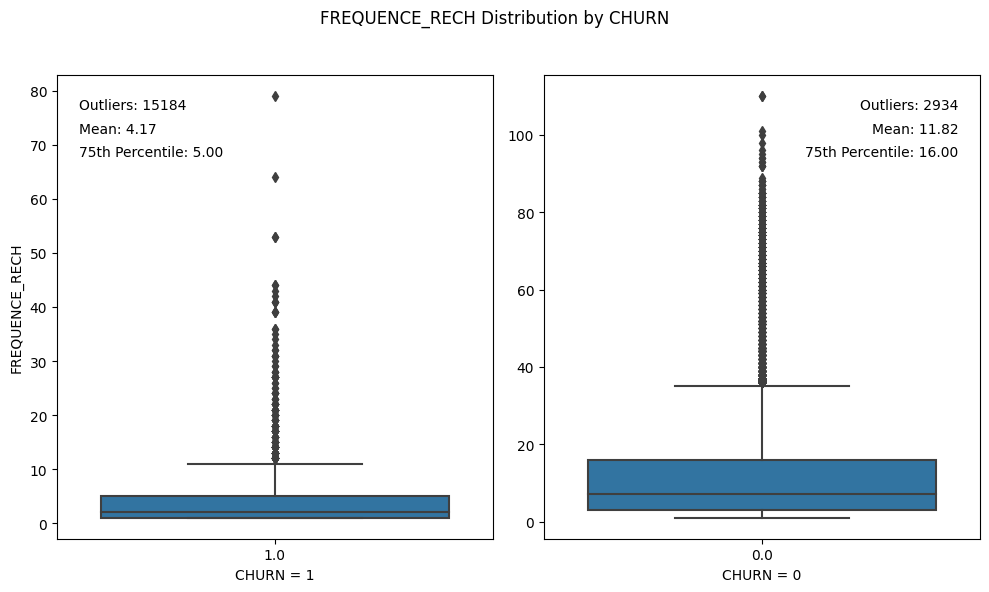

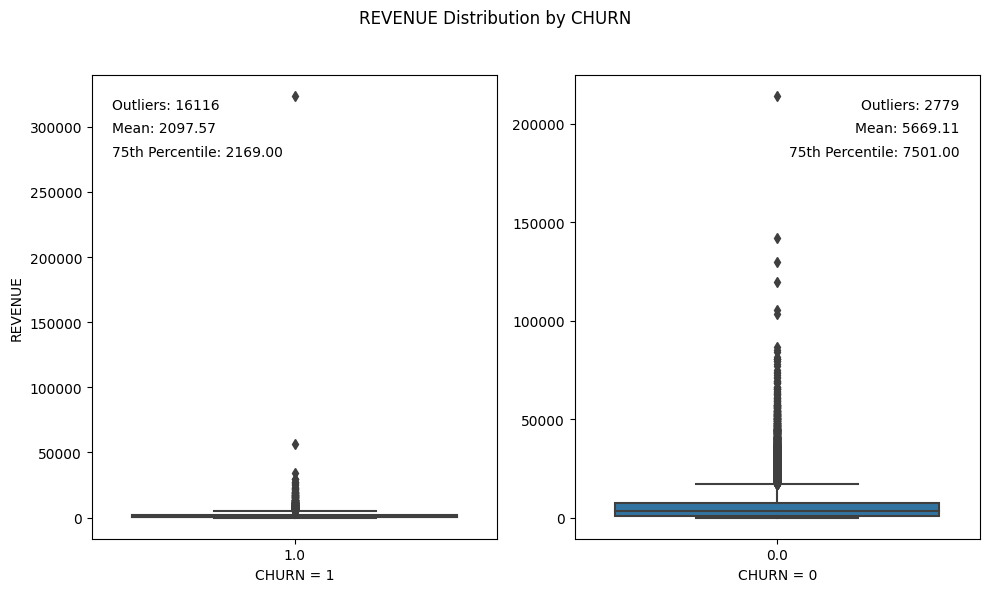

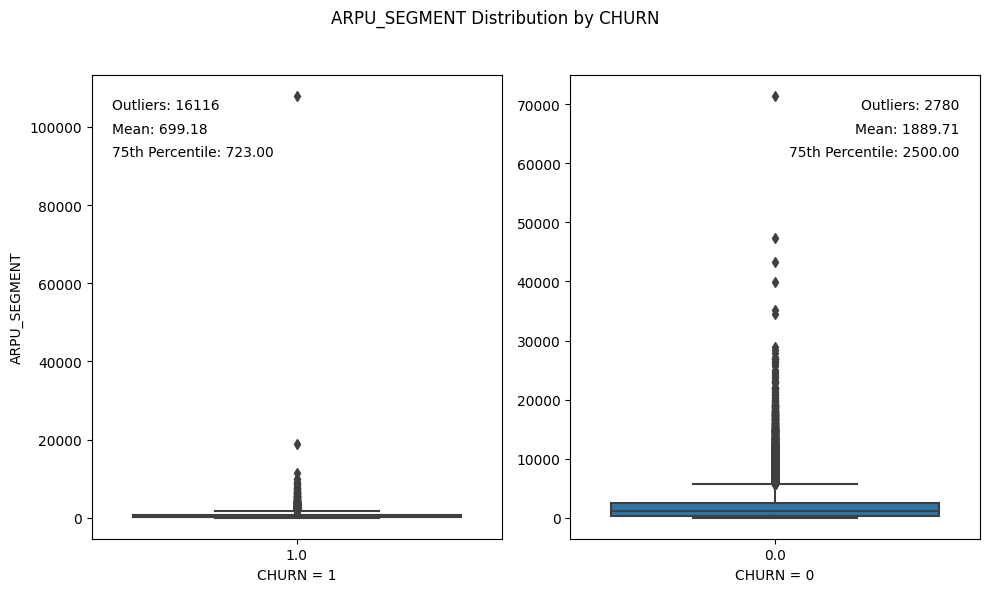

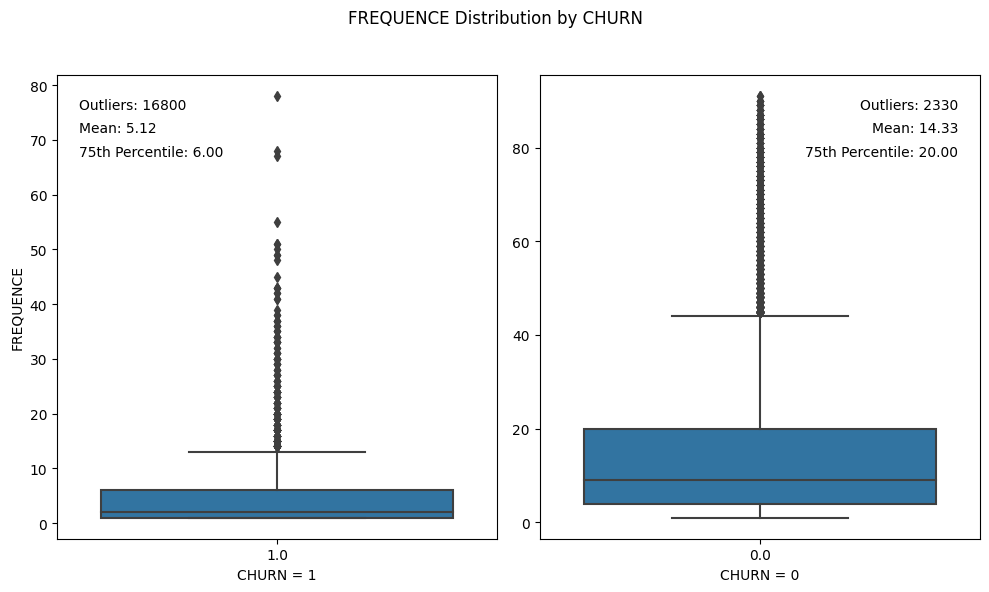

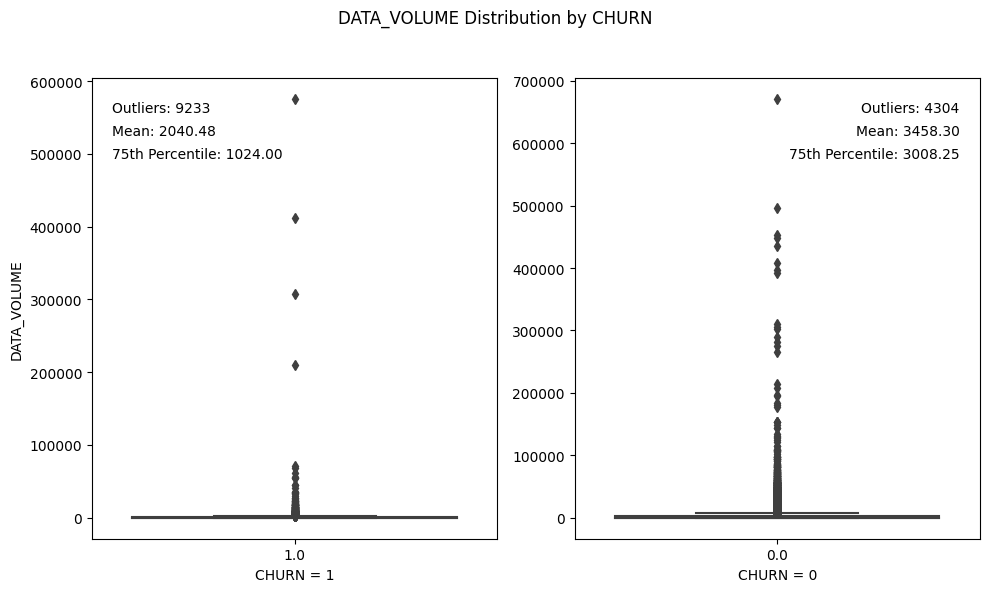

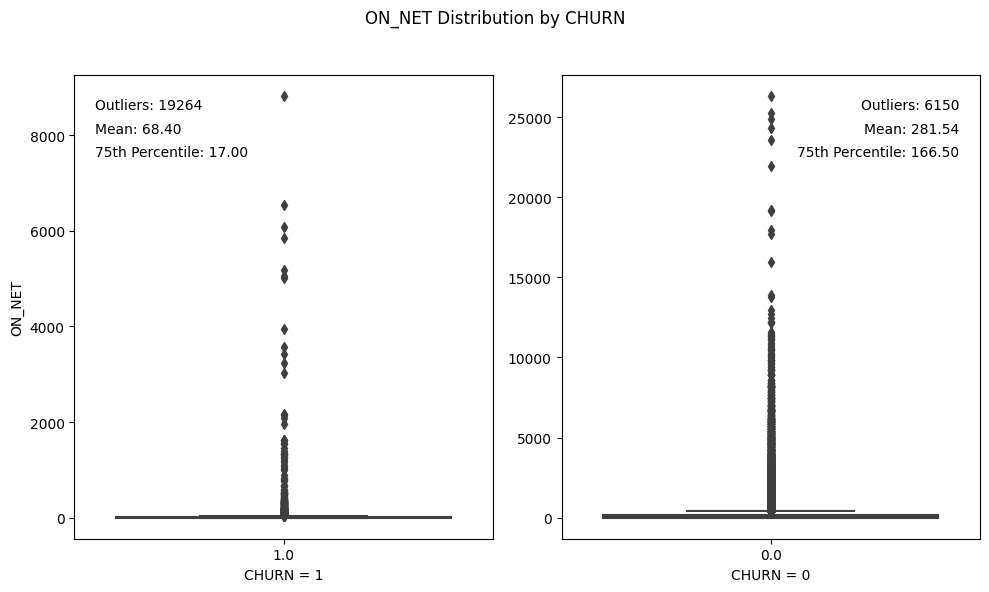

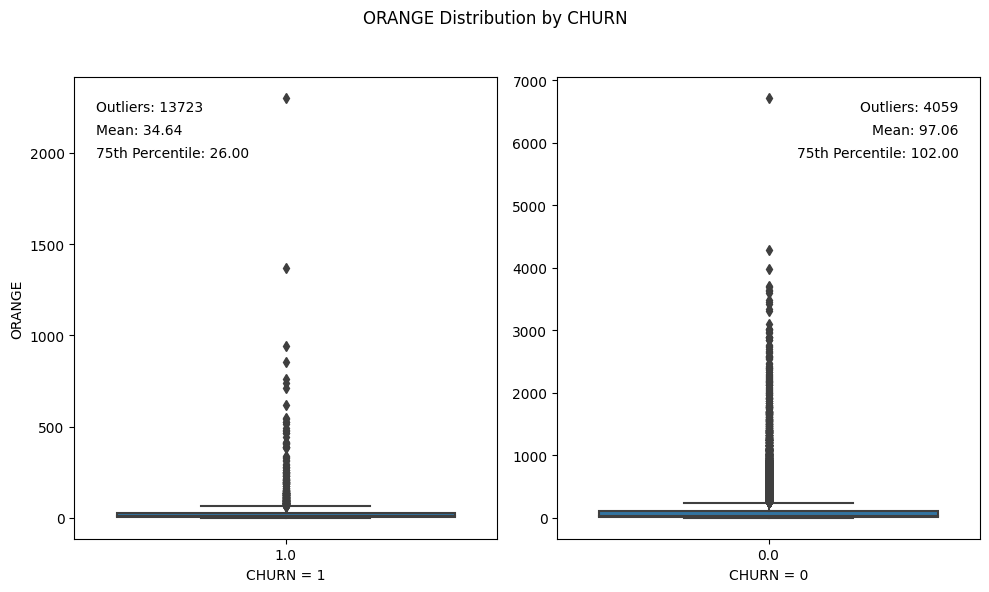

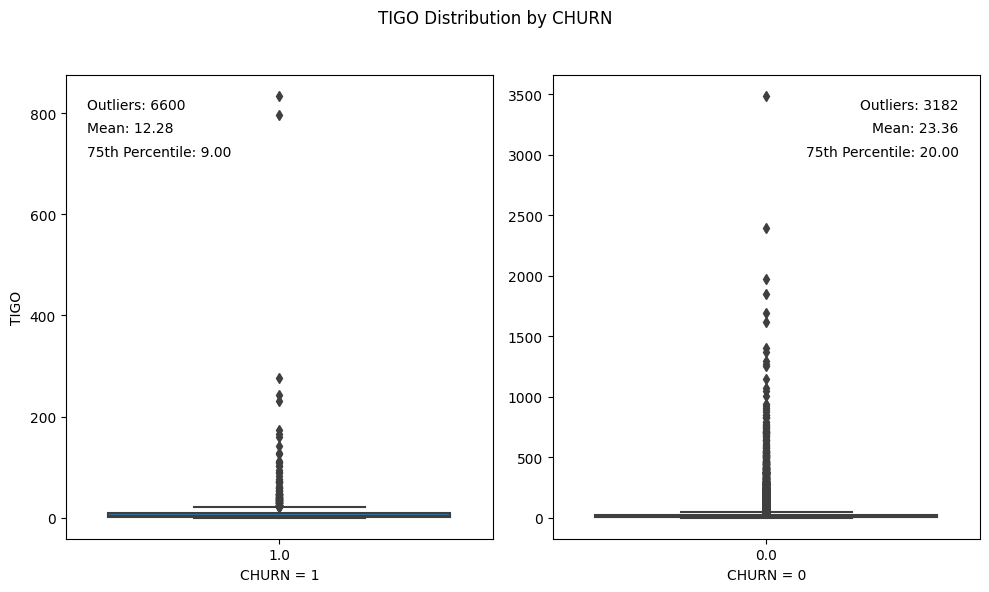

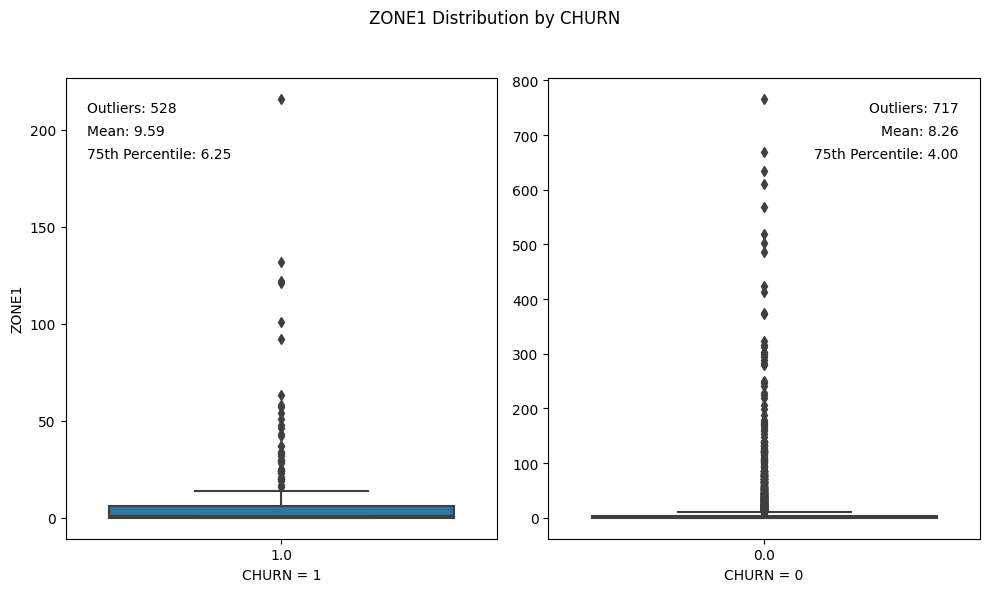

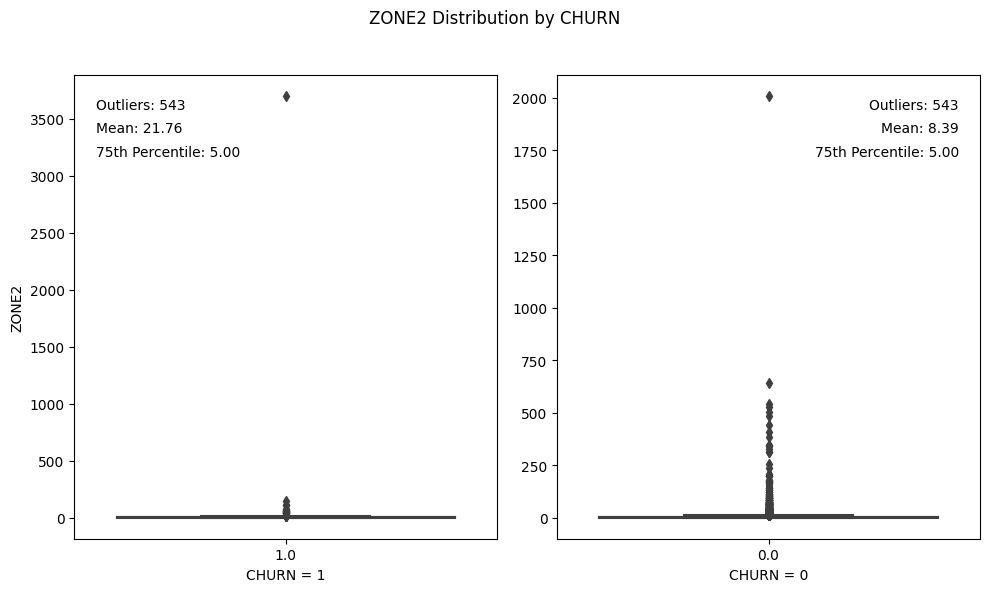

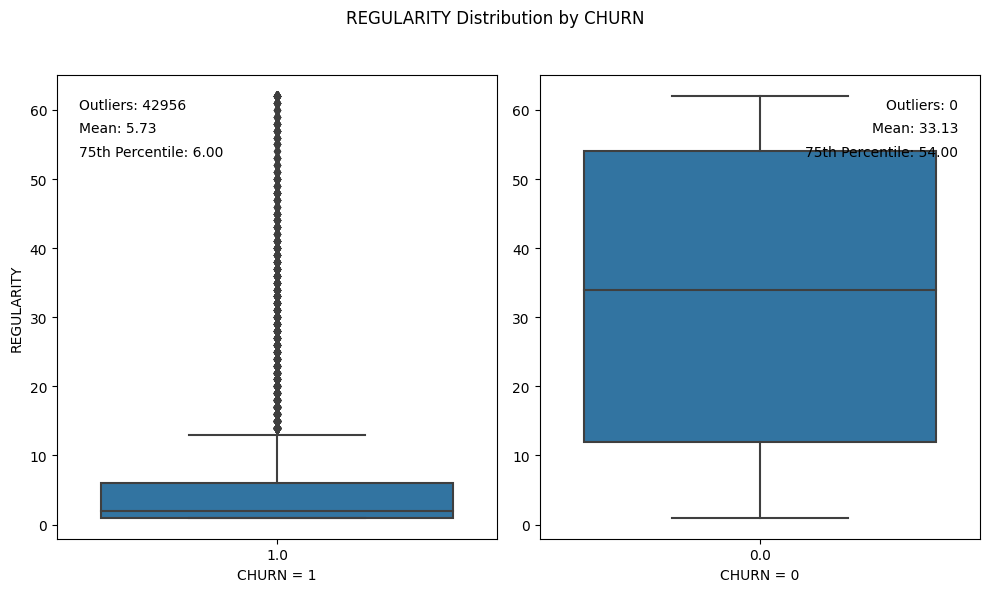

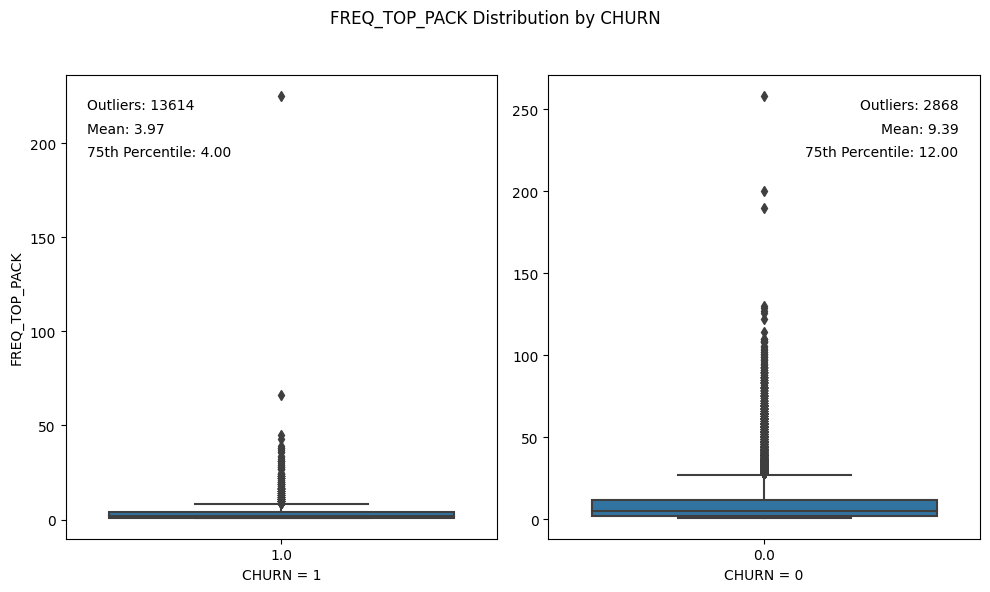

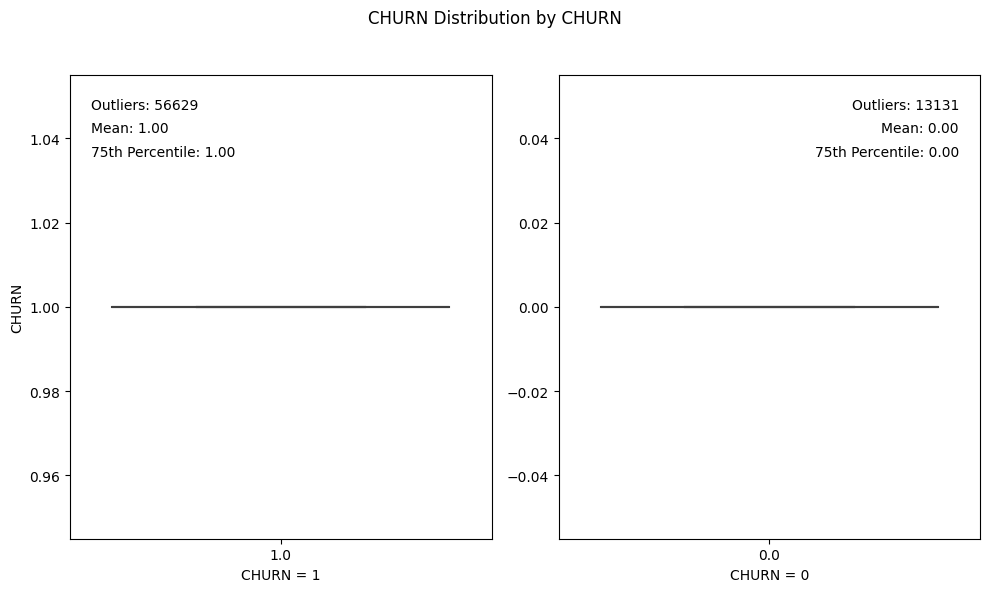

In [24]:
# Extracting all numerical variables
for col in num_cols:
    plt.figure(figsize=(10, 6))

    # Plot boxplot for churn = 1
    plt.subplot(1, 2, 1)
    sns.boxplot(data=train[train['CHURN'] == 1], x='CHURN', y=col)
    q75_1 = train[train['CHURN'] == 1][col].quantile(0.75)
    q25_1 = train[train['CHURN'] == 1][col].quantile(0.25)
    iqr_1 = q75_1 - q25_1
    outliers_1 = train[(train[col] < q25_1 - 1.5 * iqr_1) | (train[col] > q75_1 + 1.5 * iqr_1)][col]
    num_outliers_1 = len(outliers_1)
    plt.text(0.05, 0.95, f"Outliers: {num_outliers_1}", ha='left', va='top', transform=plt.gca().transAxes)
    plt.text(0.05, 0.90, f"Mean: {train[train['CHURN'] == 1][col].mean():.2f}", ha='left', va='top', transform=plt.gca().transAxes)
    plt.text(0.05, 0.85, f"75th Percentile: {q75_1:.2f}", ha='left', va='top', transform=plt.gca().transAxes)
    plt.xlabel('CHURN = 1')
    plt.ylabel(col)

    # Plot boxplot for churn = 0
    plt.subplot(1, 2, 2)
    sns.boxplot(data=train[train['CHURN'] == 0], x='CHURN', y=col)
    q75_0 = train[train['CHURN'] == 0][col].quantile(0.75)
    q25_0 = train[train['CHURN'] == 0][col].quantile(0.25)
    iqr_0 = q75_0 - q25_0
    outliers_0 = train[(train[col] < q25_0 - 1.5 * iqr_0) | (train[col] > q75_0 + 1.5 * iqr_0)][col]
    num_outliers_0 = len(outliers_0)
    plt.text(0.95, 0.95, f"Outliers: {num_outliers_0}", ha='right', va='top', transform=plt.gca().transAxes)
    plt.text(0.95, 0.90, f"Mean: {train[train['CHURN'] == 0][col].mean():.2f}", ha='right', va='top', transform=plt.gca().transAxes)
    plt.text(0.95, 0.85, f"75th Percentile: {q75_0:.2f}", ha='right', va='top', transform=plt.gca().transAxes)
    plt.xlabel('CHURN = 0')
    plt.ylabel('')

    plt.suptitle(f'{col} Distribution by CHURN')
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

In [25]:
# drop the user_ID column as we don't need it for modelling
columns_to_drop = ['user_id']

# Use the drop method to remove the specified column(s)
train = train.drop(columns=columns_to_drop)

# Display the DataFrame after dropping the column(s)
train.head()

,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK,CHURN
0,DAKAR,K > 24 month,20000.0,47.0,21602.0,7201.0,52.0,8835.0,3391.0,396.0,185.0,NaN,NaN,NO,62.0,On net 200F=Unlimited _call24H,30.0,0.0
1,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,3.0,NaN,NaN,0.0
2,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,1.0,NaN,NaN,0.0
3,SAINT-LOUIS,K > 24 month,7900.0,19.0,7896.0,2632.0,25.0,9385.0,27.0,46.0,20.0,NaN,2.0,NO,61.0,"Data:490F=1GB,7d",7.0,0.0
4,DAKAR,K > 24 month,12350.0,21.0,12351.0,4117.0,29.0,9360.0,66.0,102.0,34.0,NaN,NaN,NO,56.0,All-net 500F=2000F;5d,11.0,0.0


### **Hypothesis 1**

**Null hypothesis(H0)**: There is no significant relationship between the customers' Tenure and the churn rate. In other words, how long a customer stays does not influence whether the customer churns or not.

**Alternative hypothesisH1)**: There is a significant relationship between the customers' Tenure and the churn rate. In other words, how long a customer stays influences whether the customer churns or not.



In [26]:
from scipy.stats import chi2_contingency

In [27]:
# Creating a contingency table
contingency_table = pd.crosstab(train['TENURE'], train['CHURN'])

# Performing the chi-square test
chi2, p_value, _, _ = chi2_contingency(contingency_table)

# Printing the test results
print("Chi-square statistic:", chi2)
print("P-value:", p_value)

# Setting my significance level (alpha)
alpha = 0.05

# Comparing the obtained p-value with alpha
if p_value < alpha:
    print("Reject the null hypothesis. There is no significant relationship between TENURE and CHURN.")
else:
    print("Fail to reject the null hypothesis. There is a significant relationship between TENURE and CHURN.")

Chi-square statistic: 196.2088680553934
P-value: 7.286606807569806e-39
Reject the null hypothesis. There is no significant relationship between TENURE and CHURN.


### **Hypothesis 2**

**Null hypothesis(H0)**: There is no significant relationship between the customers' Revenue and the churn rate. In other words, a customers income does not influence whether the customer churns or not.

**Alternative hypothesisH1)**: There is a significant relationship between the customers' Revenue and the churn rate. In other words, a customers income influences whether the customer churns or not.

In [28]:
# Creating a contingency table
contingency_table = pd.crosstab(train['REVENUE'], train['CHURN'])

# Performing the chi-square test
chi2, p_value, _, _ = chi2_contingency(contingency_table)

# Printing the test results
print("Chi-square statistic:", chi2)
print("P-value:", p_value)

# Setting my significance level (alpha)
alpha = 0.05

# Comparing the obtained p-value with alpha
if p_value < alpha:
    print("Reject the null hypothesis. There is no significant relationship between REVENUE and CHURN.")
else:
    print("Fail to reject the null hypothesis. There is a significant relationship between REVENUE and CHURN.")

Chi-square statistic: 9971.226573648106
P-value: 0.9999999999999996
Fail to reject the null hypothesis. There is a significant relationship between REVENUE and CHURN.


### Answering Business Questions

## 1. What is the Company’s overall churn rate throughout the observed period?

> Indented block



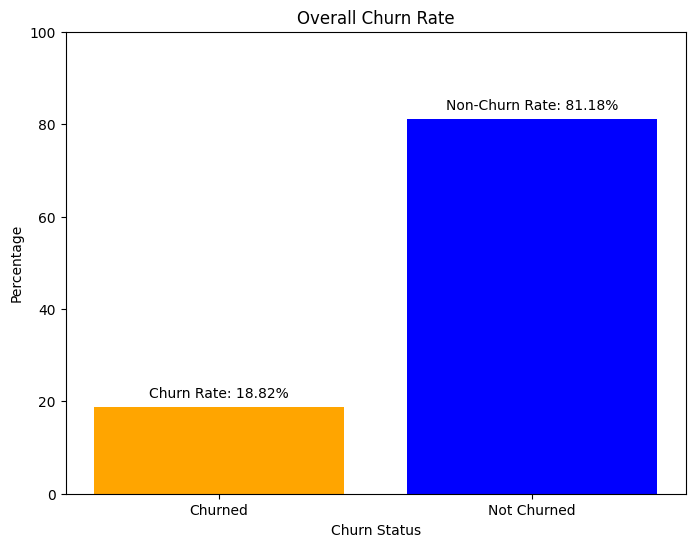

In [29]:
# Calculate the overall churn rate
churn_rate = train['CHURN'].mean() * 100

# Create a bar plot
plt.figure(figsize=(8, 6))
plt.bar(['Churned', 'Not Churned'], [churn_rate, 100 - churn_rate], color=['orange', 'blue'])
plt.xlabel('Churn Status')
plt.ylabel('Percentage')
plt.title('Overall Churn Rate')
plt.ylim(0, 100)
plt.text(0, churn_rate + 2, f'Churn Rate: {churn_rate:.2f}%', ha='center')
plt.text(1, 100 - churn_rate + 2, f'Non-Churn Rate: {100 - churn_rate:.2f}%', ha='center')

plt.show()


The churn rate is a measure of the percentage of customers who stopped using a company's product or service during a specific time period. In this case, the observed period is not specified, but it seems to be the duration covered by the dataset.

The given result indicates that the company's overall churn rate is 18.82% while the percentage of those who did not churn is 81.18%. This means that, during the observed period, approximately 18.82% of the customers in the dataset stopped using the telecom company's services and became inactive.

A churn rate of 18.82% suggests that a significant portion of customers decided to discontinue their relationship with the company during the specified time frame. This could be due to various reasons such as dissatisfaction with services, competitive offerings, or changes in customer needs.


## 2. Are there particular regions that exhibit a higher churn rate than others?

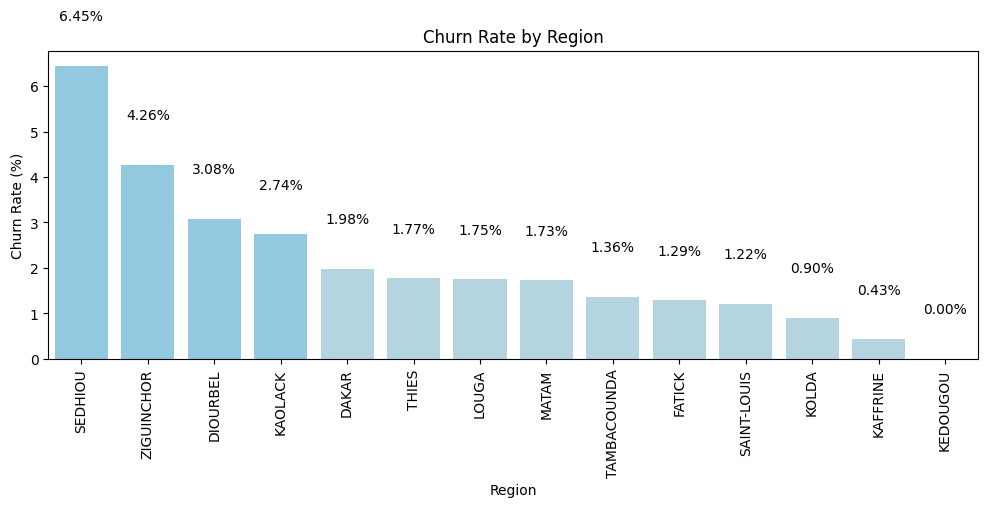

In [30]:
# Calculate the churn rate by region
churn_rate_by_region = train.groupby('REGION')['CHURN'].mean() * 100

# Sort the regions by churn rate in descending order
sorted_regions = churn_rate_by_region.sort_values(ascending=False)

# Define colors for the bars
colors = ['skyblue' if rate > sorted_regions.mean() else 'lightblue' for rate in sorted_regions]

# Create a bar plot
plt.figure(figsize=(12, 4))
sns.barplot(x=sorted_regions.index, y=sorted_regions, palette=colors)
plt.xlabel('Region')
plt.ylabel('Churn Rate (%)')
plt.title('Churn Rate by Region')

# Add labels to the bars
for i, rate in enumerate(sorted_regions):
    plt.text(i, rate + 1, f'{rate:.2f}%', ha='center', color='black')

plt.xticks(rotation=90)
plt.show()


The provided result indicates that different regions have varying churn rates, with Sedhiou having the highest churn rate of 6.45%, followed by Ziguinchor with 4.26%, and Diourbel with 3.08%. It's interesting to note that Kedougou has a churn rate of 0%.

The churn rate could be attributed to the following reasons:

1. **Local Market Dynamics:**
   - The telecom market can vary significantly from one region to another. Local competition, customer preferences, and economic factors can influence customer behavior.

2. **Service Quality:**
   - Regions with higher churn rates may be experiencing issues related to service quality, network coverage, or customer support. Conversely, areas with lower churn rates might have better-perceived service quality.

3. **Competitive Landscape:**
   - High churn rates in specific regions could be a result of aggressive competition from other telecom providers. Customers might be switching to competitors for better deals or services.

4. **Economic Factors:**
   - Economic conditions in different regions can impact customers' willingness to continue or switch telecom providers. Regions with economic challenges might see higher churn rates.

5. **Customer Demographics:**
   - Demographic factors such as age, income levels, or technological adoption rates can vary across regions, influencing how customers perceive and use telecom services.

As for Kedougou having a churn rate of 0%, it could be due to a variety of reasons:

- **Low Customer Base:**
  - If Kedougou has a relatively small customer base, the churn rate might appear as 0% because there are no instances of customers churning in the observed dataset.

- **Stable Customer Behavior:**
  - Customers in Kedougou may exhibit stable and consistent behavior, leading to a lack of churn during the observed period.

- **Data Limitations:**
  - It's also possible that the dataset might not capture all relevant information, and there may be missing data or factors influencing churn that are not accounted for.


## 3 Which tenure are likely to churn more are compared to the average rate of churn?

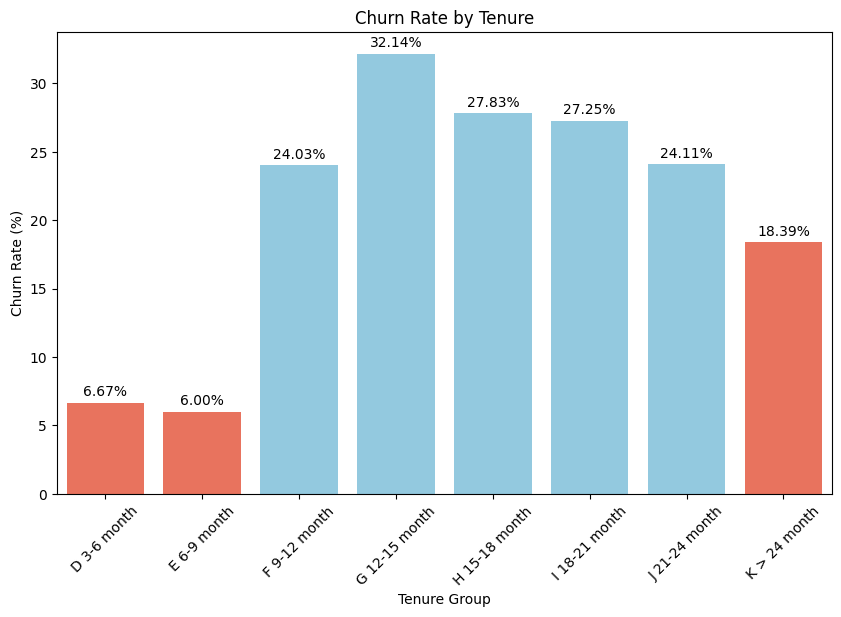

In [31]:
# Calculate the churn rate by tenure group
churn_rate_by_tenure = train.groupby('TENURE')['CHURN'].mean() * 100

# Sort the tenure groups in ascending order
sorted_tenure = churn_rate_by_tenure.sort_index()

# Define colors for the bars
colors = ['tomato' if rate < sorted_tenure.mean() else 'skyblue' for rate in sorted_tenure]

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=sorted_tenure.index, y=sorted_tenure, palette=colors)
plt.xlabel('Tenure Group')
plt.ylabel('Churn Rate (%)')
plt.title('Churn Rate by Tenure')

# Add labels to the bars
for i, rate in enumerate(sorted_tenure):
    plt.text(i, rate + 0.5, f'{rate:.2f}%', ha='center', color='black')

plt.xticks(rotation=45)
plt.show()


The graph shows that customers with a tenure in the range of G 12-15 months have the highest churn rate at 32.14%, followed by H 15-18 months with 27.83%, and I 18-21 months with 27.25%. Let's explore potential explanations for these observations:

1. **Transition Period:**
   - Customers in the G 12-15 month range might be going through a critical transition period. It's a phase where initial enthusiasm or promotional benefits may wear off, and customers reassess the value they derive from the telecom services.

2. **Competitive Offers:**
   - During the 12-18 month tenure range, customers may start receiving offers from competitors. These offers could entice them to switch providers, contributing to the higher churn rates.

3. **Service Satisfaction:**
   - Customers in the G, H, and I tenure ranges might have experienced a peak in service dissatisfaction or encountered issues that influence their decision to churn. Identifying and addressing these pain points can be crucial in reducing churn.

4. **Promotional Period End:**
   - Initial sign-up promotions or discounted rates often end after the first year. Customers who joined for promotional benefits might be more likely to churn after this period.

5. **Market Dynamics:**
   - The telecom market might have specific dynamics during these tenure ranges, with increased competition or changing customer preferences.

4. Is there a relationship between the top-up amount (MONTANT) and the churn rate?

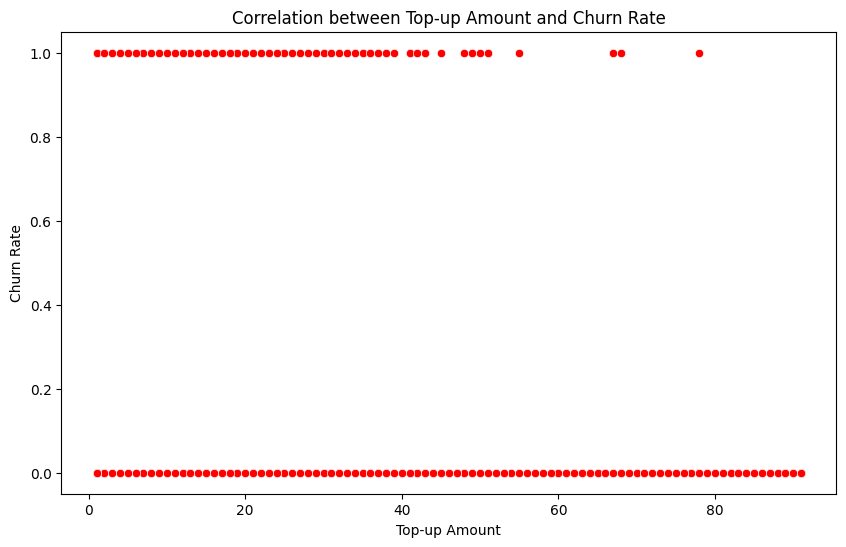

In [32]:
# Plot correlation between top-up amount and churn rate
plt.figure(figsize=(10, 6))
sns.scatterplot(data=train, x='FREQUENCE', y='CHURN',  color='red')
plt.title('Correlation between Top-up Amount and Churn Rate')
plt.xlabel('Top-up Amount')
plt.ylabel('Churn Rate')
plt.show()

The observation from the scatter plot that there is no apparent relationship between the top-up amount (MONTANT) and the churn rate suggests that, based on the visual representation, there is no clear trend or correlation between these two variables.

This could be due to:
1. **Diverse Customer Behavior:**
   - Customers may have varied preferences and reasons for topping up their accounts, and these reasons might not necessarily correlate with their likelihood to churn. Factors influencing churn could be more complex and multifaceted.

2. **Other Influencing Factors:**
   - Churn is likely influenced by a combination of factors such as service quality, customer satisfaction, and competitive offerings. The top-up amount alone may not capture these complex dynamics.


5. Is there a reduced likelihood of churn among customers who frequently activate specific top-pack packages (TOP_PACK)?

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


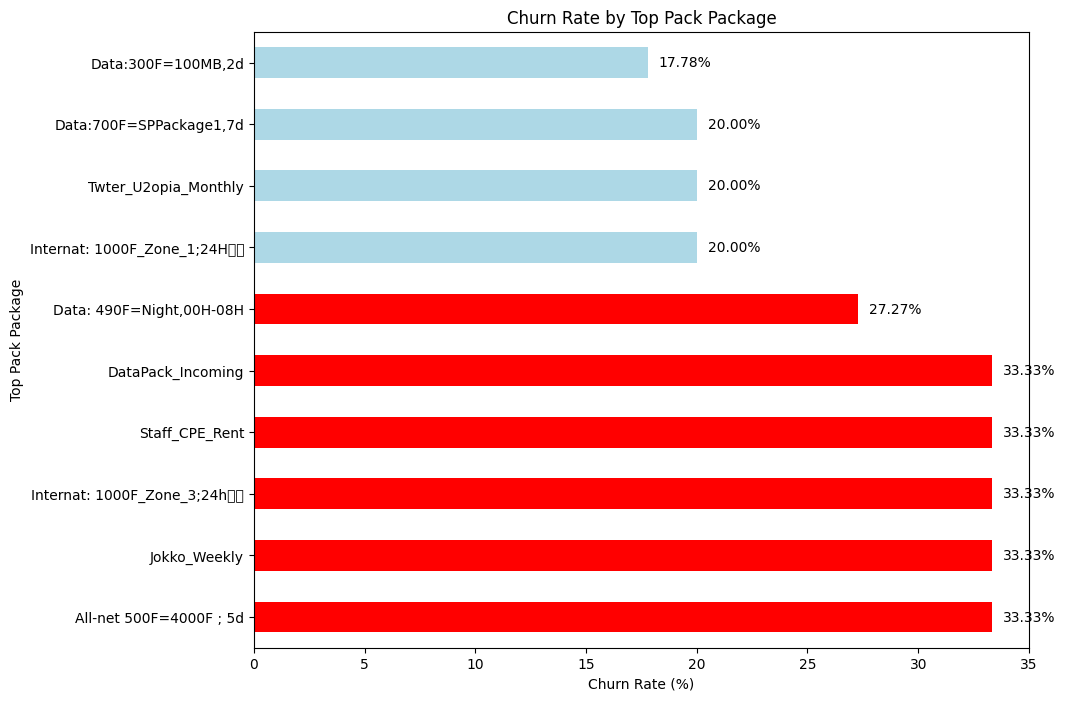

In [33]:
# Calculate the churn rate by top pack packages
churn_rate_by_top_pack = train.groupby('TOP_PACK')['CHURN'].mean() * 100

# Sort the churn rates in descending order and select the top 10
churn_rate_by_top_pack = churn_rate_by_top_pack.sort_values(ascending=False).head(10)

# Define colors for the bars
colors = ['red' if rate > churn_rate_by_top_pack.mean() else 'lightblue' for rate in churn_rate_by_top_pack]

# Plot the bar chart
plt.figure(figsize=(10, 8))
ax = churn_rate_by_top_pack.plot(kind='barh', color=colors)
plt.xlabel('Churn Rate (%)')
plt.ylabel('Top Pack Package')
plt.title('Churn Rate by Top Pack Package')

# Add labels to the bars
for i, rate in enumerate(churn_rate_by_top_pack):
    plt.text(rate + 0.5, i, f'{rate:.2f}%', va='center')

plt.show()

The observation that specific top-pack packages, such as "all-net 500F=4000F;5d," "jokko_weekly," "Internat," "staff_cpe_rent," and "datapack_incoming," have high churn rates of 33.33% suggests that, for customers activating these particular packages, there is a higher likelihood of churning compared to the average churn rate.

This could be due to:

1. **Mismatched Expectations:**
   - Customers subscribing to these specific packages might have expectations that are not met after activation. If the services or benefits provided by these packages do not align with customer expectations, it could lead to dissatisfaction and churn.

2. **Service Quality Issues:**
   - The packages with high churn rates might be associated with services or features that are prone to issues or dissatisfaction. Customers experiencing problems with the activated packages may be more likely to churn.

3. **Competitive Offerings:**
   - High-churn packages might face strong competition from other providers offering similar or better packages. Customers might be attracted to better deals from competitors, contributing to higher churn rates.

4. **Limited Appeal:**
   - The specific packages might have a limited appeal or relevance to the customer base, leading to a higher likelihood of churn after activation.


:6. Do customers with a higher volume of on-net calls (ON_NET) demonstrate a lower likelihood of churning?

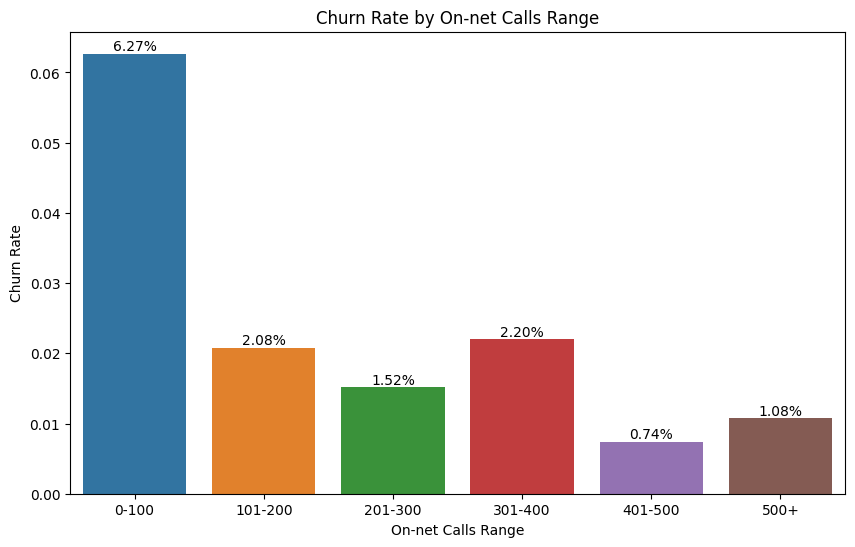

In [34]:

# Create bins for ON_NET
labels = pd.cut(train['ON_NET'], bins=[0, 100, 200, 300, 400, 500, float('inf')],
                labels=['0-100', '101-200', '201-300', '301-400', '401-500', '500+'])

# 'labels' now contains the bin labels for each value in 'ON_NET'

# Calculate the churn rate for different ranges of on-net calls
churn_rate_by_onnet_range = train.groupby(labels)['CHURN'].mean()

# Plot the churn rate for different ranges of on-net calls
plt.figure(figsize=(10, 6))
sns.barplot(x=churn_rate_by_onnet_range.index, y=churn_rate_by_onnet_range.values)
plt.title('Churn Rate by On-net Calls Range')
plt.xlabel('On-net Calls Range')
plt.ylabel('Churn Rate')

# Add labels to the bars
ax = plt.gca()
for i, bar in enumerate(ax.patches):
    height = bar.get_height()
    percentage = f'{height * 100:.2f}%'
    ax.text(bar.get_x() + bar.get_width() / 2, height, percentage, ha='center', va='bottom')

plt.show()



The observation from the bar graph that customers with a higher volume of on-net calls (ON_NET) demonstrate a lower likelihood of churning suggests a potential correlation between on-net call usage and customer loyalty. This could be due to:

1. **Network Loyalty:**
   - Customers making a higher volume of on-net calls may be more loyal to the telecom company's network. On-net calls typically involve communication within the same network, and customers who frequently use this feature may be more invested in the services provided by the company.

2. **Social Circle:**
   - On-net calls often involve communication with friends, family, or colleagues who are also on the same network. Customers with a strong social circle within the same network may have a higher sense of community and may be less inclined to switch providers.

3. **Network Quality Perception:**
   - Higher on-net call usage might indicate a positive perception of the network quality. If customers find the on-net calls reliable and of good quality, they may be less likely to explore alternative providers.

4. **Bundled Services:**
   - Customers who frequently use on-net calls may be subscribers to bundled services that include additional benefits for on-net communication. Bundled offerings can enhance customer satisfaction and loyalty.

5. **Cost Savings:**
   - On-net calls are often more cost-effective for customers, as they may be included in certain packages or have lower rates. The perceived cost savings may contribute to customer satisfaction and loyalty.


## 7. Is there a disparity in churn rates between customers who regularly refill their accounts (FREQUENCE_RECH) and those who refill less frequently?


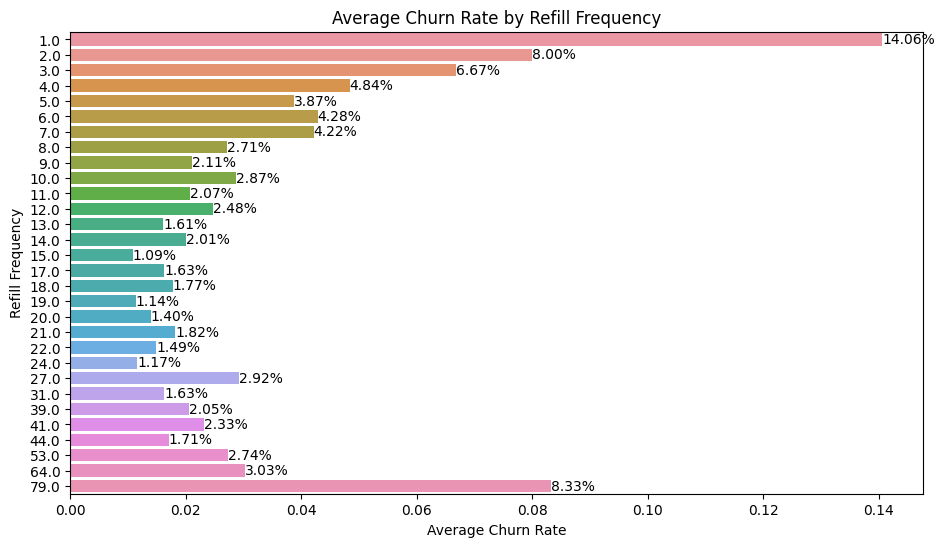

In [35]:
# Calculate the average churn rate for different categories of refill frequency
avg_churn_rate = train.groupby('FREQUENCE_RECH')['CHURN'].mean().sort_values(ascending=False).head(30)

# Plot the average churn rate for different refill frequency categories
plt.figure(figsize=(11, 6))
sns.barplot(x=avg_churn_rate.values, y=avg_churn_rate.index, orient='horizontal')
plt.title('Average Churn Rate by Refill Frequency')
plt.xlabel('Average Churn Rate')
plt.ylabel('Refill Frequency')

# Add labels to the bars
ax = plt.gca()
for i, bar in enumerate(ax.patches):
    width = bar.get_width()
    percentage = f'{width * 100:.2f}%'
    ax.text(width, bar.get_y() + bar.get_height() / 2, percentage, ha='left', va='center')

plt.show()


The observation from the graph that customers who refill their accounts with different frequencies exhibit varying churn rates suggests a potential correlation between refill frequency (FREQUENCE_RECH) and the likelihood of churning. This could be as a result of:

1. **Engagement and Loyalty:**
   - Customers who frequently refill their accounts may be more engaged with the telecom services and demonstrate a higher level of loyalty. Regular refills may indicate an ongoing commitment to using the services.

2. **Promotional Incentives:**
   - Customers with a higher refill frequency might be benefiting from promotional incentives or loyalty programs tied to frequent refills. These incentives can contribute to customer retention.

3. **Service Dependence:**
   - Customers who rely heavily on the telecom services may need to refill more frequently. This dependence on the services could lead to a lower likelihood of churning as they have a continuous need for the services.

4. **Financial Commitment:**
   - Frequent refills might suggest a financial commitment to the telecom services. Customers who invest more in the services may be less likely to switch providers due to the perceived value.

5. **Behavioral Patterns:**
   - Different customer segments may have distinct behavioral patterns related to refill frequency. Understanding these patterns can help tailor retention strategies to specific customer needs.

# Feature Processing & Engineering


In [ ]:
# Check for missing values in the DataFrame
missing_values = train.isnull()

# Count missing values in each column
missing_count = missing_values.sum()

print(missing_count)

REGION            24157
TENURE                1
MONTANT           21518
FREQUENCE_RECH    21518
REVENUE           20549
ARPU_SEGMENT      20549
FREQUENCE         20549
DATA_VOLUME       30223
ON_NET            22187
ORANGE            25436
TIGO              36714
ZONE1             56293
ZONE2             57224
MRG                   1
REGULARITY            1
TOP_PACK          25628
FREQ_TOP_PACK     25628
CHURN                 1
dtype: int64


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61063 entries, 0 to 61062
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   REGION          36906 non-null  object 
 1   TENURE          61062 non-null  object 
 2   MONTANT         39545 non-null  float64
 3   FREQUENCE_RECH  39545 non-null  float64
 4   REVENUE         40514 non-null  float64
 5   ARPU_SEGMENT    40514 non-null  float64
 6   FREQUENCE       40514 non-null  float64
 7   DATA_VOLUME     30840 non-null  float64
 8   ON_NET          38876 non-null  float64
 9   ORANGE          35627 non-null  float64
 10  TIGO            24349 non-null  float64
 11  ZONE1           4770 non-null   float64
 12  ZONE2           3839 non-null   float64
 13  MRG             61062 non-null  object 
 14  REGULARITY      61062 non-null  float64
 15  TOP_PACK        35435 non-null  object 
 16  FREQ_TOP_PACK   35435 non-null  float64
 17  CHURN           61062 non-null 

Missing Values:

* Some columns, such as ZONE1, ZONE2, and DATA_VOLUME, have a substantial number of missing values.

* TENURE seems to be of type object. It might be worth checking its unique values to understand if it needs conversion to a numerical type.
Categorical Variables:

* REGION, TENURE, MRG, and TOP_PACK are categorical variables. You may need to encode them for machine learning models.
Target Variable:

* CHURN is the target variable, and it's already encoded as 0 or 1.
Memory Usage:

## Dropping Unnecessary Columns

In [ ]:
train.drop(["TOP_PACK","REGION","MRG"],axis=1,inplace=True)

### Handling the TENURE co

In [ ]:
train['TENURE'].unique()

array(['K > 24 month', 'E 6-9 month', 'H 15-18 month', 'G 12-15 month',
       'I 18-21 month', 'J 21-24 month', 'F 9-12 month', 'D 3-6 month',
       nan], dtype=object)

We represent each category with a numerical value that reflects its position or significance in the overall tenure scale.
'K > 24 month': 25

We will take that a customer with tenure greater than 24 months can be represented by a value slightly higher than the maximum range value (24).
'E 6-9 month': 8

This assumes the mid-point of the range (6-9) for customers in this category.
'H 15-18 month': 16.5

Similarly, assumes the mid-point for the other ranges.

In [ ]:
# Define the encoding dictionary
tenure_encoding = {
    'K > 24 month': 25,
    'E 6-9 month': 8,
    'H 15-18 month': 16.5,
    'G 12-15 month': 13.5,
    'I 18-21 month': 19.5,
    'J 21-24 month': 22.5,
    'F 9-12 month': 10.5,
    'D 3-6 month': 4.5
}

# Apply the encoding to create a new numerical column
train['TENURE_NUMERIC'] = train['TENURE'].map(tenure_encoding)


In [ ]:
# WE drop the previus tenure column
train.drop("TENURE",axis=1,inplace=True)

In [ ]:
train.head()

,REGION,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,FREQ_TOP_PACK,CHURN,TENURE_NUMERIC
0,DAKAR,20000.0,47.0,21602.0,7201.0,52.0,8835.0,3391.0,396.0,185.0,NaN,NaN,NO,62.0,30.0,0.0,25.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,3.0,NaN,0.0,25.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,1.0,NaN,0.0,25.0
3,SAINT-LOUIS,7900.0,19.0,7896.0,2632.0,25.0,9385.0,27.0,46.0,20.0,NaN,2.0,NO,61.0,7.0,0.0,25.0
4,DAKAR,12350.0,21.0,12351.0,4117.0,29.0,9360.0,66.0,102.0,34.0,NaN,NaN,NO,56.0,11.0,0.0,25.0


## Imputing the Missing Values

In [ ]:
# Dividing numerical and categorical columns
numerical_columns = train.select_dtypes(include=['int64', 'float64','int32']).columns
categorical_columns = train.select_dtypes(include=['object']).columns

# Subset of the numerical columns
train_num = train[numerical_columns]

# A subset of the categorical columns
train_cat = train[categorical_columns]
# Convert boolean columns to strings
train_cat = train_cat.astype(str)
#THe shape of each
train_num.shape,train_cat.shape

((61063, 15), (61063, 2))

In [ ]:
#Numerical columns
print(f"The numerical columns in the train dataset are:",train_num.columns)

#Categorical columns
print(f"\nThe categorical columns in the train dataset are:",train_cat.columns)

The numerical columns in the train dataset are: Index(['MONTANT', 'FREQUENCE_RECH', 'REVENUE', 'ARPU_SEGMENT', 'FREQUENCE',
       'DATA_VOLUME', 'ON_NET', 'ORANGE', 'TIGO', 'ZONE1', 'ZONE2',
       'REGULARITY', 'FREQ_TOP_PACK', 'CHURN', 'TENURE_NUMERIC'],
      dtype='object')

The categorical columns in the train dataset are: Index(['REGION', 'MRG'], dtype='object')


In [ ]:
#Imputing the numerical columns using median
numerical_imputer = SimpleImputer(strategy='median')

In [ ]:
#Imputing the numerical columns in the train dataset
for column in train_num:
    train[column] = numerical_imputer.fit_transform(train[column].values.reshape(-1, 1))

In [ ]:
train.isna().sum()

MONTANT           0
FREQUENCE_RECH    0
REVENUE           0
ARPU_SEGMENT      0
FREQUENCE         0
DATA_VOLUME       0
ON_NET            0
ORANGE            0
TIGO              0
ZONE1             0
ZONE2             0
REGULARITY        0
FREQ_TOP_PACK     0
CHURN             0
TENURE_NUMERIC    0
dtype: int64

# Handling Imbalanced Data using SMOTE

SMOTE (Synthetic Minority Over-sampling Technique) is a popular technique used to address class imbalance in machine learning. In our dataset, the number of instances in the minority class (Churned) is much smaller than the number of instances in the majority class (those who did not churn). This can lead to poor performance of our machine learning models, as they tend to be biased towards the majority class.

The basic idea behind SMOTE is to create new minority class samples by randomly selecting one or more of the k-nearest neighbors of each minority class sample, and using them to create new synthetic samples (Nababan et al., 2023).

In [ ]:
# Splitting the dataset into features (X) and target variable (y)
X = train.drop('CHURN', axis=1)
y = train['CHURN']

In [ ]:
#Cloning the class SMOTE and specifying the sampling strategy
smote = SMOTE(sampling_strategy='minority')
X_resampled, y_resampled= smote.fit_resample(X, y)

#
y_resampled.value_counts()

0.0    49612
1.0    49612
Name: CHURN, dtype: int64

In [ ]:
print(X_resampled.shape)
print(y_resampled.shape)

(99224, 14)
(99224,)


## Data Splitting

In [ ]:
from sklearn.model_selection import train_test_split
# Split the data into training and evaluation sets
X_train, X_eval, y_train, y_eval = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42,stratify=y_resampled)

In [ ]:
X_train.shape,X_eval.shape,y_train.shape,y_eval.shape


((79379, 14), (19845, 14), (79379,), (19845,))

In [ ]:
train.head()

,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,REGULARITY,FREQ_TOP_PACK,CHURN,TENURE_NUMERIC
0,20000.0,47.0,21602.0,7201.0,52.0,8835.0,3391.0,396.0,185.0,1.0,2.0,62.0,30.0,0.0,25.0
1,3000.0,6.0,3000.0,1000.0,9.0,249.0,27.0,28.0,6.0,1.0,2.0,3.0,5.0,0.0,25.0
2,3000.0,6.0,3000.0,1000.0,9.0,249.0,27.0,28.0,6.0,1.0,2.0,1.0,5.0,0.0,25.0
3,7900.0,19.0,7896.0,2632.0,25.0,9385.0,27.0,46.0,20.0,1.0,2.0,61.0,7.0,0.0,25.0
4,12350.0,21.0,12351.0,4117.0,29.0,9360.0,66.0,102.0,34.0,1.0,2.0,56.0,11.0,0.0,25.0


## Scaling

In [ ]:
#Cloning the standardscaler class
scaler =StandardScaler().set_output(transform="pandas")
#Fitting and transforming the selected columns in the training data set
X_train_scaled=scaler.fit_transform(X_train)

#Transforming the selected columns  in the evaluation dataset
X_eval_scaled= scaler.transform(X_eval)


In [ ]:
#Checking on the scaled training set
X_train_scaled.head()

,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,REGULARITY,FREQ_TOP_PACK,TENURE_NUMERIC
44132,-0.628320,-0.230454,-0.563495,-0.563304,-0.170140,-0.115305,-0.206421,-0.363633,-0.124974,-0.054426,-0.020123,0.453312,-0.189020,0.228833
11964,-0.492181,-0.567603,-0.471938,-0.471940,-0.777238,-0.130672,-0.219030,-0.198214,-0.124974,-0.054426,-0.020123,-0.773118,-0.454507,0.228833
73395,-0.191876,-0.230454,-0.182810,-0.182812,-0.170140,-0.130672,-0.173996,-0.190337,-0.124974,-0.054426,-0.020123,-0.867459,-0.189020,0.228833
28167,-0.191876,-0.230454,-0.182810,-0.182812,-0.170140,-0.130672,-0.173996,-0.190337,-0.124974,-0.054426,-0.020123,-0.584436,-0.189020,0.228833
84235,-0.191876,-0.230454,-0.182810,-0.182812,-0.170140,-0.130672,-0.173996,-0.190337,-0.124974,-0.054426,-0.020123,-0.490095,-0.189020,0.228833


In [ ]:
#To check on the scaled evaluation on the predictor set
X_eval_scaled.head()

,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,REGULARITY,FREQ_TOP_PACK,TENURE_NUMERIC
68521,-0.191876,-0.230454,-0.182810,-0.182812,-0.170140,-0.130672,-0.173996,-0.190337,-0.124974,-0.054426,-0.020123,-0.820288,-0.189020,0.228833
80755,-0.191876,-0.516288,-0.182810,-0.182812,-0.581897,-0.151809,-0.173996,-0.190337,-0.124974,-0.054426,-0.020123,-0.610887,-0.459115,0.228833
37465,-0.191876,-0.230454,-0.182810,-0.182812,-0.170140,-0.130672,-0.173996,-0.190337,-0.124974,-0.054426,-0.020123,-0.867459,-0.189020,0.228833
36158,-0.592283,-0.679986,-0.567543,-0.567352,-0.878421,-0.052206,-0.208222,-0.261231,-0.210531,-0.054426,-0.020123,0.500483,-0.719994,0.228833
31664,1.379723,3.141031,1.399684,1.399876,3.270082,-0.130672,6.687354,1.518995,0.046141,-0.054426,-0.020123,2.009936,0.740185,0.228833


# Modelling

In [ ]:
# Defining a list of models that will be evaluated
models = [
    ('Logistic Regression', LogisticRegression(random_state=42)),
    ('Random Forest', RandomForestClassifier(random_state=42)),
    ('Support Vector Machine', SVC(random_state=42)),
    ('Gaussian Naive Bayes', GaussianNB()),
    ('K-Nearest Neighbors', KNeighborsClassifier()),
    ('Decision Tree', DecisionTreeClassifier(random_state=42)),
    ('XGBoost', XGBClassifier(random_state=42)),
    ('LightGBM', LGBMClassifier(random_state=42)),
]

# Initializing an empty dataframe that will store the evaluation scores
results_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC-ROC'])

# Iterate over the models and train, evaluate, and store the results
for model_name, model in models:
    # Fitting the models to the training dataset
    model.fit(X_train_scaled, y_train)

    # Make predictions using the evaluation dataset
    y_pred = model.predict(X_eval_scaled)

    # Calculate performance metrics
    accuracy = accuracy_score(y_eval, y_pred)
    precision = precision_score(y_eval, y_pred)
    recall = recall_score(y_eval, y_pred)
    f1 = f1_score(y_eval, y_pred)
    auc_roc = roc_auc_score(y_eval, y_pred)

    # Store the results in the dataframe
    results_df = results_df.append({
        'Model': model_name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'AUC-ROC': auc_roc
    }, ignore_index=True)

<ipython-input-60-55014124eb14>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
<ipython-input-60-55014124eb14>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
<ipython-input-60-55014124eb14>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
<ipython-input-60-55014124eb14>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
<ipython-input-60-55014124eb14>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = 

[LightGBM] [Info] Number of positive: 39690, number of negative: 39689
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012102 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3350
[LightGBM] [Info] Number of data points in the train set: 79379, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500006 -> initscore=0.000025
[LightGBM] [Info] Start training from score 0.000025


<ipython-input-60-55014124eb14>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


In [ ]:
results_df

,Model,Accuracy,Precision,Recall,F1 Score,AUC-ROC
0,Logistic Regression,0.816276,0.772585,0.896392,0.829896,0.816280
1,Random Forest,0.884152,0.850676,0.931869,0.889423,0.884155
2,Support Vector Machine,0.824641,0.787281,0.889639,0.835336,0.824644
3,Gaussian Naive Bayes,0.706727,0.634193,0.976920,0.769103,0.706741
4,K-Nearest Neighbors,0.847216,0.816113,0.896392,0.854371,0.847218
5,Decision Tree,0.860418,0.818660,0.925922,0.868994,0.860422
6,XGBoost,0.876291,0.840866,0.928240,0.882395,0.876294
7,LightGBM,0.881834,0.847856,0.930659,0.887330,0.881837


This table provides evaluation metrics for different machine learning models,in this case we will focus on the F1 score as a key metric. The table shows that:

1. **Logistic Regression:**
   - F1 Score: 0.830
   - The Logistic Regression model achieves a balanced performance with a good trade-off between precision and recall. The F1 score of 0.830 suggests a relatively strong performance in capturing both false positives and false negatives.

2. **Random Forest:**
   - F1 Score: 0.889
   - The Random Forest model demonstrates a high F1 score, indicating robust performance in terms of precision and recall. It strikes a good balance between identifying true positives and avoiding false positives and false negatives.

3. **Support Vector Machine:**
   - F1 Score: 0.835
   - The Support Vector Machine model achieves a decent F1 score, implying a reasonable balance between precision and recall. It performs well in capturing both positive and negative instances.

4. **Gaussian Naive Bayes:**
   - F1 Score: 0.769
   - The Gaussian Naive Bayes model shows a lower F1 score compared to some other models. This suggests that it may struggle with precision or recall, possibly due to the assumption of independence among features.

5. **K-Nearest Neighbors:**
   - F1 Score: 0.854
   - The K-Nearest Neighbors model performs well with a high F1 score, indicating effective classification and a good balance between precision and recall.

6. **Decision Tree:**
   - F1 Score: 0.869
   - The Decision Tree model demonstrates a strong F1 score, implying a good compromise between precision and recall. It effectively handles false positives and false negatives.

7. **XGBoost:**
   - F1 Score: 0.882
   - The XGBoost model performs well with a high F1 score, suggesting excellent precision and recall. It excels in capturing true positives while minimizing false positives and false negatives.

8. **LightGBM:**
   - F1 Score: 0.887
   - The LightGBM model achieves a high F1 score, indicating strong performance in terms of precision and recall. It demonstrates effectiveness in classification tasks.

Models with higher F1 scores are generally better at capturing true positives while minimizing false positives and false negatives, making them suitable for binary classification tasks like churn prediction. in this case, Random forest, XGboost and lightGBM had the highest f1 score.

## Hyperparameter Tuning
Hyperparameter tuning aims to find the optimal combination of hyperparameters that will result in the best performance of the model on the given dataset (Bartz-Beielstein & Zaefferer, 2023). There are various approaches to perform hyperparameter tuning. For this project, grid search was used where you get to define a grid of the possible hyperparameters values and evaluate the model's performance for each combination. This ensures that all the possible combinations have been explored.


## Hyperparameter Tuning for the Random Forest Model

In [ ]:
RandomForestClassifier().get_params()


{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [ ]:
# Defining the parameter grid for Random Forest m
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5,10],
    'min_samples_leaf': [1, 2,4]
}

In [ ]:
# Defining a random forest model
rf = RandomForestClassifier(random_state=42)
#Perfoming a grid search using cross validation
grid_search_rf = GridSearchCV(rf, param_grid_rf, scoring='f1', cv=5)
grid_search_rf.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='f1')

In [ ]:
# Getting the best parameters
best_params_rf = grid_search_rf.best_params_
best_score_rf = grid_search_rf.best_score_

In [ ]:
#Displaying the best parameters
print(f"The best hyperparameters for the Random Forest model are:\n{best_params_rf}")

The best hyperparameters for the Random Forest model are:
{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


## Hyperparameter Tuning on Gradient boosting

In [ ]:
# Define the parameter grid for Grid Search
param_grid = {
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7]
}

In [ ]:
# Define the Gradient Boosting model
gb_model = GradientBoostingClassifier(random_state=42)

In [ ]:
# Performing Grid Search with cross-validation
grid_search = GridSearchCV(gb_model, param_grid, cv=5, scoring='f1')
grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=42),
             param_grid={'learning_rate': [0.1, 0.01, 0.001],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [100, 200, 300]},
             scoring='f1')

In [ ]:
# Get the best hyperparameters and the best model
best_params = grid_search.best_params_
best_gb = grid_search.best_estimator_

In [ ]:
print(f"The best hyperparameters for the Gradient boosting classifier are: \n{best_params}")


The best hyperparameters for the Gradient boosting classifier are: 
{'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 300}


## Hyperparameter Tuning for The LightGBM model

In [ ]:
# Defining the parameter grid for LightGBM
param_grid_lgbm = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15],
    'learning_rate': [0.1, 0.01, 0.001]
}

In [ ]:
# Creating a LightGBM classifier
lgbm = LGBMClassifier(random_state=42)

# Performing Grid Search Cross Validation
grid_search_lgbm = GridSearchCV(lgbm, param_grid_lgbm, scoring='f1', cv=5)
grid_search_lgbm.fit(X_train_scaled, y_train)

Streaming output truncated to the last 5000 lines.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

GridSearchCV(cv=5, estimator=LGBMClassifier(random_state=42),
             param_grid={'learning_rate': [0.1, 0.01, 0.001],
                         'max_depth': [5, 10, 15],
                         'n_estimators': [100, 200, 300]},
             scoring='f1')

In [ ]:
# Getting the best parameters and best F1 score
best_params_lgbm = grid_search_lgbm.best_params_
best_score_lgbm = grid_search_lgbm.best_score_

In [ ]:
#Printing the best hyperparameters
print(f"The best hyperparameters for the light gbm model are:\n{best_params_lgbm}")

The best hyperparameters for the light gbm model are:
{'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 300}


In [ ]:
#Printing the best hyperparameters
print(f"The best hyperparameters for the light gbm model are:\n{best_params_lgbm}")

The best hyperparameters for the light gbm model are:
{'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 300}


## Perfomance Comparison after Hyperparameter Tuning

In [ ]:
# Initialize an empty dataframe to store the evaluation scores
results_tuned_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC-ROC'])

# Define the models with the best hyperparameters
rf_model_tuned = RandomForestClassifier(n_estimators=200, max_depth=None, min_samples_split=2, min_samples_leaf=1, random_state=42)
lgbm_model_tuned = LGBMClassifier(learning_rate=0.1, n_estimators=300, max_depth=10, random_state=42)
gb_model_tuned = GradientBoostingClassifier(random_state=42,learning_rate=0.1,max_depth=7,n_estimators=300)

# Fit the tuned models to the training data
rf_model_tuned.fit(X_train_scaled, y_train)
lgbm_model_tuned.fit(X_train_scaled, y_train)
gb_model_tuned.fit(X_train_scaled,y_train)


# Make predictions on the evaluation data
y_pred_rf = rf_model_tuned.predict(X_eval_scaled)
y_pred_lgbm = lgbm_model_tuned.predict(X_eval_scaled)
y_pred_gb =gb_model_tuned.predict(X_eval_scaled)

# Calculate the evaluation scores
accuracy_rf = accuracy_score(y_eval, y_pred_rf)
precision_rf = precision_score(y_eval, y_pred_rf)
recall_rf = recall_score(y_eval, y_pred_rf)
f1_rf = f1_score(y_eval, y_pred_rf)
auc_roc_rf = roc_auc_score(y_eval, y_pred_rf)

accuracy_lgbm = accuracy_score(y_eval, y_pred_lgbm)
precision_lgbm = precision_score(y_eval, y_pred_lgbm)
recall_lgbm = recall_score(y_eval, y_pred_lgbm)
f1_lgbm = f1_score(y_eval, y_pred_lgbm)
auc_roc_lgbm = roc_auc_score(y_eval, y_pred_lgbm)

accuracy_gb = accuracy_score(y_eval, y_pred_gb)
precision_gb = precision_score(y_eval, y_pred_gb)
recall_gb = recall_score(y_eval, y_pred_gb)
f1_gb = f1_score(y_eval, y_pred_gb)
auc_roc_gb = roc_auc_score(y_eval, y_pred_gb)

# Adding the results to the dataframe
results_tuned_df = results_tuned_df.append({'Model': 'Random Forest (Tuned)',
                                'Accuracy': accuracy_rf,
                                'Precision': precision_rf,
                                'Recall': recall_rf,
                                'F1 Score': f1_rf,
                                'AUC-ROC': auc_roc_rf}, ignore_index=True)

results_tuned_df = results_tuned_df.append({'Model': 'LightGBM (Tuned)',
                                'Accuracy': accuracy_lgbm,
                                'Precision': precision_lgbm,
                                'Recall': recall_lgbm,
                                'F1 Score': f1_lgbm,
                                'AUC-ROC': auc_roc_lgbm}, ignore_index=True)

results_tuned_df = results_tuned_df.append({'Model': 'Gradient Boosting (Tuned)',
                                'Accuracy': accuracy_gb,
                                'Precision': precision_gb,
                                'Recall': recall_gb,
                                'F1 Score': f1_gb,
                                'AUC-ROC': auc_roc_gb}, ignore_index=True)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 39690, number of negative: 39689
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006466 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3350
[LightGBM] [Info] Number of data points in the train set: 79379, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500006 -> initscore=0.000025
[LightGBM] [Info] Start training from score 0.000025
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


<ipython-input-84-8be833c4ba07>:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_tuned_df = results_tuned_df.append({'Model': 'Random Forest (Tuned)',
<ipython-input-84-8be833c4ba07>:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_tuned_df = results_tuned_df.append({'Model': 'LightGBM (Tuned)',
<ipython-input-84-8be833c4ba07>:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_tuned_df = results_tuned_df.append({'Model': 'Gradient Boosting (Tuned)',


In [ ]:
results_tuned_df

,Model,Accuracy,Precision,Recall,F1 Score,AUC-ROC
0,Random Forest (Tuned),0.883850,0.850723,0.931062,0.889081,0.883852
1,LightGBM (Tuned),0.885865,0.852176,0.933683,0.891069,0.885868
2,Gradient Boosting (Tuned),0.888788,0.857540,0.932473,0.893438,0.888790


## Feature Importance

In [ ]:
# Get feature importances from the Random Forest model
feature_importances = gb_model_tuned.feature_importances_

# Create a dataframe to store the feature importances
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
})

# Sort the dataframe by feature importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print the feature importance dataframe
feature_importance_df

,Feature,Importance
11,REGULARITY,0.792055
6,ON_NET,0.039244
12,FREQ_TOP_PACK,0.027244
5,DATA_VOLUME,0.023229
0,MONTANT,0.019328
8,TIGO,0.017162
7,ORANGE,0.015755
4,FREQUENCE,0.015233
1,FREQUENCE_RECH,0.012899
2,REVENUE,0.011481


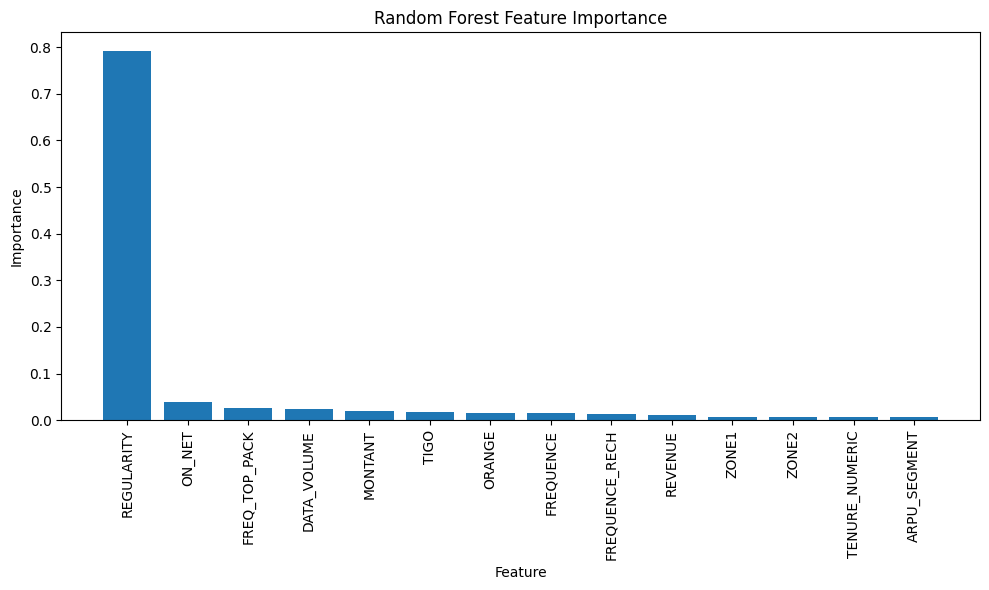

In [ ]:
# Plotting the feature importances
plt.figure(figsize=(10, 6))
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xticks(rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Random Forest Feature Importance')
plt.tight_layout()
plt.show()

In [ ]:
gb_model_tuned_d = GradientBoostingClassifier(random_state=42,learning_rate=0.1,max_depth=7,n_estimators=300)

In [ ]:
#Dropping the Senior Citizen column in both the training and evaluation datasets
X_train_scaled_d = X_train_scaled.drop(['ARPU_SEGMENT','TENURE_NUMERIC','ZONE2','ZONE1'],axis=1)
X_eval_scaled_d = X_eval_scaled.drop(['ARPU_SEGMENT','TENURE_NUMERIC','ZONE2','ZONE1'],axis=1)

In [ ]:
#Fitting the model in the train dataset
gb_model_tuned_d.fit(X_train_scaled_d,y_train)


GradientBoostingClassifier(max_depth=7, n_estimators=300, random_state=42)

In [ ]:
#Predicting on the evaluation dataser
y_pred_d= gb_model_tuned_d.predict(X_eval_scaled_d)

In [ ]:
#Calculating the metrics
f1_rf = f1_score(y_pred_d, y_pred_gb)
accuracy_rf = accuracy_score(y_pred_d,y_pred_gb)

In [ ]:
#Displaying the result
print(f'The f1 score for the random forest model with Senior Citizen column is: {f1_rf}')
print(f'\n The accuracy score for the random forest model without Senior Citizen column is: {accuracy_rf}')

The f1 score for the random forest model with Senior Citizen column is: 0.9906040268456375

 The accuracy score for the random forest model without Senior Citizen column is: 0.9897707231040564


In [ ]:
#Requirements file
!pip freeze > requirements.txt

In [ ]:
components = {
    #'encoder': encoder,
    'scaler': scaler,
    'grid_search_rfc':grid_search_rf,
    'model': gb_model_tuned_d
}

In [ ]:
with open ('ML_Model.pkl', 'wb') as file:
    pickle.dump(components, file)